<a href="https://colab.research.google.com/github/iarbietonilsson/Credit-Card-Market-Segmentation/blob/main/CreditCardMarketSegmentation_Ingrid_Project2_4e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Market Segmentation / Project 2 - Part 4 (Core)**

---

* ### Ingrid Arbieto Nelson

# **Overview : Part 1**<a name='Part 1: Overview'>

---
![image](https://drive.google.com/uc?id=1kRUsWwtU1KS6sgNJyHOgLpmphNLr1JS6)

[**Image credit**](https://www.istockphoto.com/portfolio/alexialex?mediaty)
## **Chosen Dataset : Predicting Credit Card Customer Segmentation** 

### **Part 1**

---



#### **1 Source of data**
*  [Credit Card Customer Segmentation](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)
   * [The Devastator](https://www.kaggle.com/thedevastator)

#### **2 Brief description of data**

*This dataset contains a wealth of customer information collected from within a consumer credit card portfolio, with the aim of helping analysts predict customer attrition. It includes comprehensive demographic details such as age, gender, marital status and income category, as well as insight into each customer’s relationship with the credit card provider such as the card type, number of months on book and inactive periods. Additionally it holds key data about customers’ spending behavior drawing closer to their churn decision such as total revolving balance, credit limit, average open to buy rate and analyzable metrics like total amount of change from quarter 4 to quarter 1, average utilization ratio and Naive Bayes classifier attrition flag (Card category is combined with contacts count in 12months period alongside dependent count plus education level & months inactive). Faced with this set of useful predicted data points across multiple variables, capture up-to-date information that can determine long term account stability or an impending departure; therefore, offering us an equipped understanding when seeking to manage a portfolio or serve individual customers.*

#### **3 What is the target?**

*The target is whether the bank customer will churn.*

**Attrition_Flag:** *Flag indicating whether a customer has churned out*

#### **4 What does one row represent? *(A person? A business? An event? A product?)***

*Each row represents a bank customer.*

#### **5 Is this a classification or regression problem?**

*This is a classification problem. The goal is to determine whether the bank customer has churned or not. This is a yes or no question.*

#### **6 How many features does the data have?**

*There are 20 features.*
<br />

#### ***Features:***

---  

![image](https://drive.google.com/uc?id=1BdR6oZbzLq5_G7bSbuDTgzO9MsNfHnWH)
![image](https://drive.google.com/uc?id=1K9EBqKt0tl-nPodKxe822cirt7l7dhW-)
<br />

#### **7 How many rows are in the dataset?**

*There are 10,127 rows.*

#### **8 What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

* *There are numerous numerical & categorical columns to encode, which could be fun!*
* *Attrition class is imbalanced, so this could cause some tuning of hyperparameter challenges in this assignment.*
* *I'm curious about the Native Bayes Classifier Attrition Flag, and looking into what that means.*



# **Data Cleaning & Exploratory Data Analysis (EDA): Part 2**<a name = 'Data Cleaning & Exploratory Data Analysis (EDA): Part 2'>

---


## **Assignment: Part 2**


Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

* *Deleted unnecessary columns.*
* *Deleted duplicate rows.*
* *Identified and addressed missing values.*
* *Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).*
* *Produced univariate visuals for the target and all features.*
* *Identified outliers.*
* *Clearly commented all of your cleaning steps and described any decisions you made.*

## **Data Cleaning**

---

### **Import Libraries**

---



In [ ]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn.metrics import (ConfusionMatrixDisplay,  
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Unsupervised Learning
from sklearn.decomposition import PCA

## Import SMOTE
from imblearn.over_sampling import SMOTE
## Import special pipeline for smote
from imblearn.pipeline import make_pipeline as smote_pipe

## Import RandomUnderSampler from imblearn
from imblearn.pipeline import make_pipeline as imblearn_pipe
from imblearn.under_sampling import RandomUnderSampler
## Import RandomUnderSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram')

### **Load Data**

---


In [ ]:
file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTJRlbZpZfRCHuwSt6HBuzDTp5y37PdIVLHRtk4uq4WgpZ1jttdnIlpkTys2LSqXEBELtg04ZZylJBU/pub?gid=468663766&single=true&output=csv'
df = pd.read_csv(file)

# display 1st 5 rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

* Data appears to have loaded correctly.
* We are unable to view all the columns.
* Naive Bayes Classifier Attrition Flags have long names. *(for inactive years 1 & 2)*
  *  *Shorten Naive Bayes Classifier Attrition column names for readability.* 

In [ ]:
# make a copy of dataframe
df2 = df.copy()

In [ ]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f"The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable, 'Attrition Flag'.")

There are 10127 rows, and 23 columns.
The rows represent 10127 observations, and the columns represent 22 features and 1 target variable, 'Attrition Flag'.


### **Set Display Options**

---



In [ ]:
## Display all columns
pd.set_option('display.max_column', None)

### **Shorten Naive Bayes Classifier Attrition Flag Inactive Years 1 & 2 Names**

---



In [ ]:
# show column names
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
## Rename Naive Bayes Classifier Attribution Flag month 1
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Class_Inactive_1Year_Flag',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Class_Inactive_2Year_Flag'},inplace=True)

In [ ]:
# display 1st 5 rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Naive_Bayes_Class_Inactive_1Year_Flag  \
0                  0.061                               0.000093   
1                  0.105                               0.000057   
2                  0.000                               0.000021   
3                  0.760                               0.000134   
4                  0.000                               0.000022   

   Naive_Bayes_Class_Inactive_2Year_Flag  
0                                0.99991  
1                                0.99994  
2                                0.99998  
3                                0.99987  
4                                0.99998

In [ ]:
## display column names, count of non-null values, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CLIENTNUM                              10127 non-null  int64  
 1   Attrition_Flag                         10127 non-null  object 
 2   Customer_Age                           10127 non-null  int64  
 3   Gender                                 10127 non-null  object 
 4   Dependent_count                        10127 non-null  int64  
 5   Education_Level                        10127 non-null  object 
 6   Marital_Status                         10127 non-null  object 
 7   Income_Category                        10127 non-null  object 
 8   Card_Category                          10127 non-null  object 
 9   Months_on_book                         10127 non-null  int64  
 10  Total_Relationship_Count               10127 non-null  int64  
 11  Mo

In [ ]:
## display descriptive statistics for categorical columns
df.describe(include="object") # or 'number'

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

### **Remove Unnecessary Columns**

---



In [ ]:
# check how man unique client numbers exist
df['CLIENTNUM'].value_counts()

768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: CLIENTNUM, Length: 10127, dtype: int64

* CLIENTNUM (unique client number) is a unique ID for each bank customer.
   * *It is good to drop this irrevalent column, as it is unique in every row.*

In [ ]:
df.drop(columns=['CLIENTNUM','Naive_Bayes_Class_Inactive_1Year_Flag','Naive_Bayes_Class_Inactive_2Year_Flag'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### **Duplicates**

---



In [ ]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.



### **Inspect Values for Errors**

---
<br />

#### **Numeric:**
* Check for extreme or impossible values, such as negative numbers.
   * *No unusual numerical values noted.*

 ### **Summary Statistics for Numeric Features**

---

In [ ]:
## display descriptive statistics for numeric columns
df.describe(include="number").round(2) # or 'object'

Customer_Age  Dependent_count  Months_on_book  \
count      10127.00         10127.00        10127.00   
mean          46.33             2.35           35.93   
std            8.02             1.30            7.99   
min           26.00             0.00           13.00   
25%           41.00             1.00           31.00   
50%           46.00             2.00           36.00   
75%           52.00             3.00           40.00   
max           73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count             10127.00               10127.00  
mean                  0.71                   0.27  
std                   0.24                   0.28  
min                   0.00                   0.00  
25%                   0.58                   0.02  
50%                   0.70                   0.18  
75%                   0.82                   0.50  
max                   3.71                   1.00



#### **Categorical:**
* Check for inconsistent categories.
   *  *Check categorical columns for inconsistent data.*

 ### **Summary Statistics for Categorical Features**

---

In [ ]:
## display descriptive statistics for categorical columns
df.describe(include="object") # or 'number'

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
# find string data 
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
# loop through string data to inspect for inconsistent values
for col in str_cols:
   print(f'= {col}:')
   print(df[col].value_counts(dropna=False))
   print("\n\n")

= Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



= Gender:
F    5358
M    4769
Name: Gender, dtype: int64



= Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



= Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64



= Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64



= Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64





* **```Education_Level```**, **```Marital_Status```**, and **```Income_Category```** all have a category **'Unknown'**.
   *  *This appears to be a missing or unknown value.*

In [ ]:
# ? category for Education Level, Marital Status, & Income Category have category 'Unknown' => looks like missing or unknown values
# replace as missing value
df = df.replace('Unknown', np.nan)

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
df['Income_Category'].replace({'Less than $40K':'0 Less than $40K', '$40K - $60K':'1 $40K - $60K', '$80K - $120K':'3 $80K - $120K',
                               '$60K - $80K':'2 $60K - $80K', '$120K +':'4 $120K +'},inplace=True)

In [ ]:
df['Income_Category'].value_counts()

0 Less than $40K    3561
1 $40K - $60K       1790
3 $80K - $120K      1535
2 $60K - $80K       1402
4 $120K +            727
Name: Income_Category, dtype: int64

In [ ]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
df['Education_Level'].replace({'Uneducated':'0 Uneducated','High School':'1 High School', 'College':'2 College', 'Graduate':'3 Graduate', 'Post-Graduate':'4 Post-Graduate','Doctorate':'5 Doctorate'},inplace=True)

In [ ]:
df['Education_Level'].value_counts()

3 Graduate         3128
1 High School      2013
0 Uneducated       1487
2 College          1013
4 Post-Graduate     516
5 Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
df['Card_Category'].replace({'Blue':'0 Blue','Silver':'1 Silver','Gold':'2 Gold','Platinum':'3 Platinum'},inplace=True)

In [ ]:
df['Card_Category'].value_counts()

0 Blue        9436
1 Silver       555
2 Gold         116
3 Platinum      20
Name: Card_Category, dtype: int64

### **Missing Values**

---



In [ ]:
## display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 3380 missing values.


In [ ]:
## If there are missing values we could
## Display the count of missing values by column
print(df.isna().sum())

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


In [ ]:
## display percentage of missing values by column
print(df.isna().sum()/len(df)*100)

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64


* For ***Missing categorical values***, we'll need to impute with a Preprocessor for Machine Learning.
   * **Education Level** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
   * **Marital Status** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
   * **Income Category** : Plan to impute with most frequent value.
      * *This will introduce error into model.*


## **EDA : Exploratory Visuals & Analysis**

---

* EDA allows us to explore our data, and get a better understanding of trends, features of the data.
<br />
<br />

## **Numerical**


---


* For each numerical feature, we will plot the distribution, as well as a boxplot.
* Boxplots will tell us if there are any outliers.

In [ ]:
# find numerical column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# set seaborn color style
plt.style.use(['seaborn-pastel'])

<ipython-input-33-256eb2521925>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


In [ ]:
def plot_numeric(df,col):
  """EDA function to plot histogram and boxplot for selected column"""
  # figure and axes share same x-axis
  fig, axes = plt.subplots(nrows=2,figsize=(8,6),sharex=True)

  # seaborn plots with axes[i]
  sns.histplot(data=df,x=col,ax=axes[0])
  # plot shows mean value
  mean_value=df[col].mean()
  axes[0].axvline(mean_value,color='purple',ls='--',
                  label=f"Mean Value = {mean_value:,.2f}",);
  # plot shows median value
  median_value = df[col].median()
  axes[0].axvline(median_value,color='k',ls='-',
                  label=f"Median Value = {median_value:,.2f}");
  axes[0].legend();
  sns.boxplot(data=df, x = col, ax = axes[1])
 

  # title for top graph
  axes[0].set_title(f'EDA for {col}')
  # format to save figure plot to not be cutoff
  plt.tight_layout()
  plt.show()

In [ ]:
str_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
def plot_violin(data, x, y, hue,split):
  """EDA function to plot violinplot for selected column"""
  # figure and axes share same x-axis
  fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
  
  sns.violinplot(data=data,x=x,y=y, hue=hue,split=split,inner='quartiles');
  #title for graph
  axes.set_title(f'{x} vs {y} by Attrition')

  # format to save figure plot to not be cutoff
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_violinpal(data, x, y, hue,split,palette):
  """EDA function to plot violinplot for selected column"""
  # figure and axes share same x-axis
  fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
  
  sns.violinplot(data=data,x=x,y=y, hue=hue,split=split,inner='quartiles',palette=palette);
  #title for graph
  axes.set_title(f'{x} vs {y} by Attrition')

  # format to save figure plot to not be cutoff
  plt.tight_layout()
  plt.show()

### **EDA for Customer Age**

---



In [ ]:
attrition_filter = df['Attrition_Flag'] == 'Attrited Customer'
attrition_df = df.loc[attrition_filter,:]
existing_filter = df['Attrition_Flag'] == 'Existing Customer'
existing_df = df.loc[existing_filter,:]

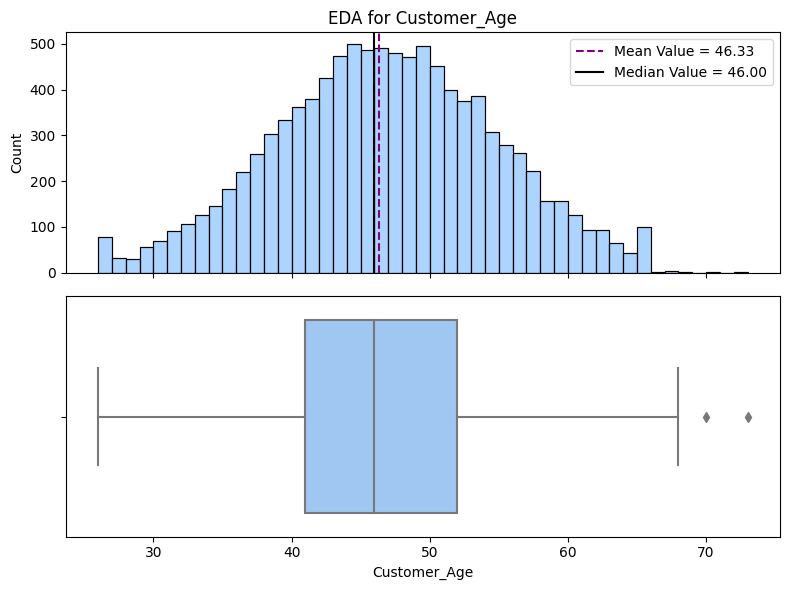

In [ ]:
plot_numeric(df,'Customer_Age')

In [ ]:
age_sorted = df['Customer_Age'].sort_values(ascending=False)
age_sorted.head()

251    73
254    70
198    68
151    68
432    67
Name: Customer_Age, dtype: int64

* Outlier Customer Age values of 73 & 70 are valid ages, not an improbable age in the dataset. 
* No ages will be dropped.

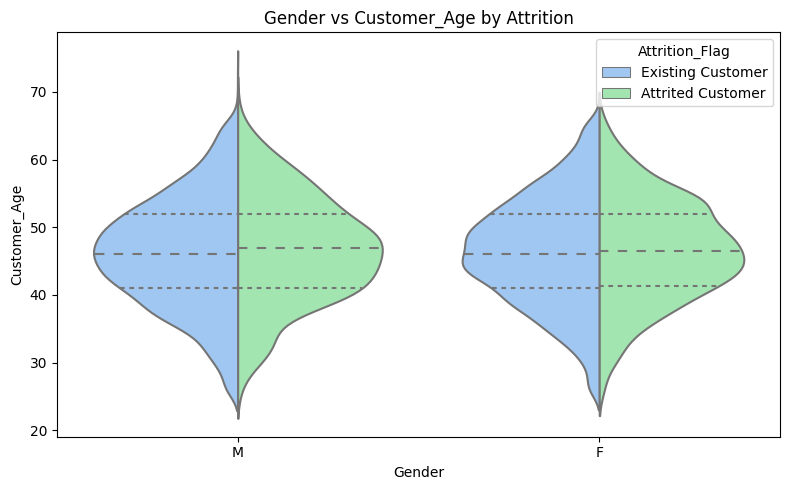

In [ ]:
plot_violin(data=df, x='Gender', y='Customer_Age',hue='Attrition_Flag',split=True)

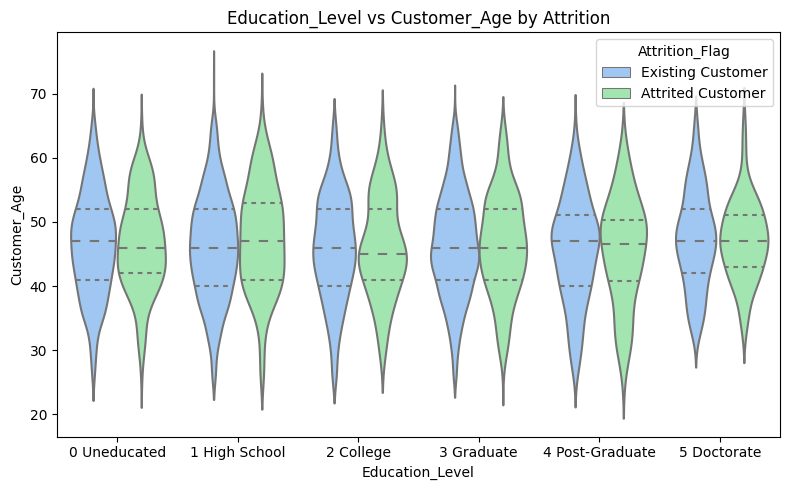

In [ ]:
plot_violin(data=df.sort_values(by='Education_Level'), x='Education_Level', y='Customer_Age',hue='Attrition_Flag',split=False)

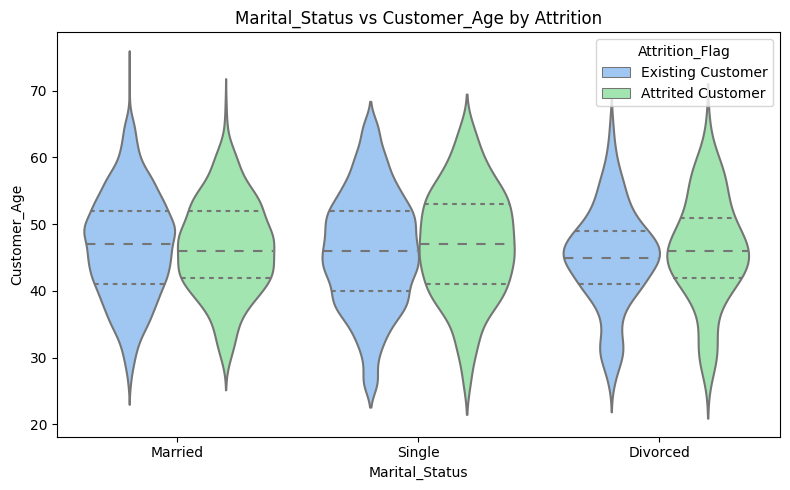

In [ ]:
plot_violin(data=df, x='Marital_Status', y='Customer_Age',hue='Attrition_Flag',split=False)

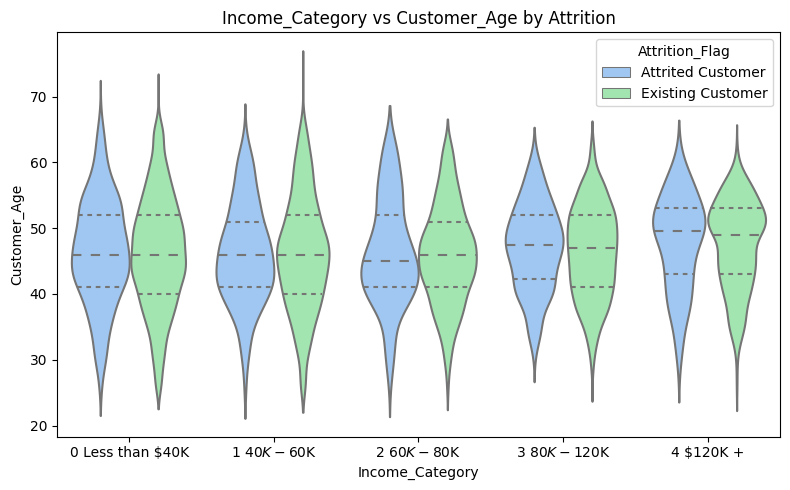

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Customer_Age',hue='Attrition_Flag',split=False)

* Higher Income customers are older, but the difference between those that exit credit card to existing customers is flat.

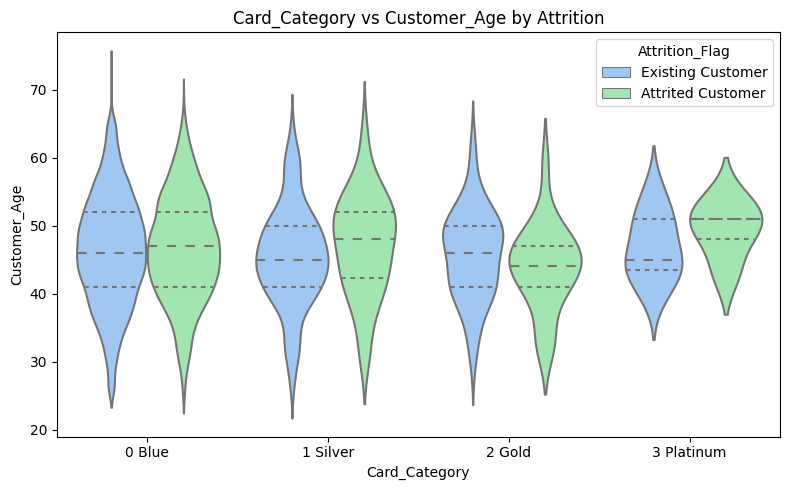

In [ ]:
plot_violin(data=df.sort_values(by='Card_Category'), x='Card_Category', y='Customer_Age',hue='Attrition_Flag',split=False)

* Older Silver and Platinum Card holders tend to exit the credit card company.

### **EDA for Dependent Count**

---

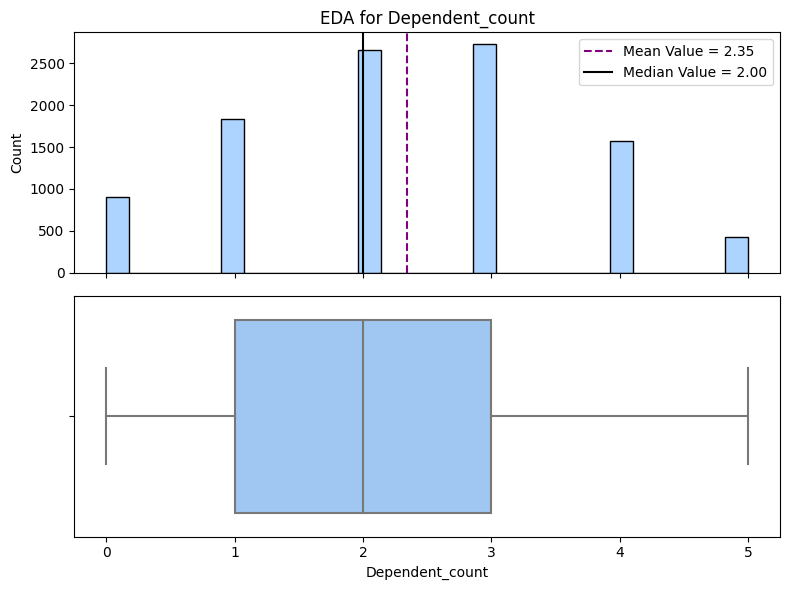

In [ ]:
plot_numeric(df,'Dependent_count')

* Dependent count has a range of values of 0 to 5.
* This is a reasonable dependent range.

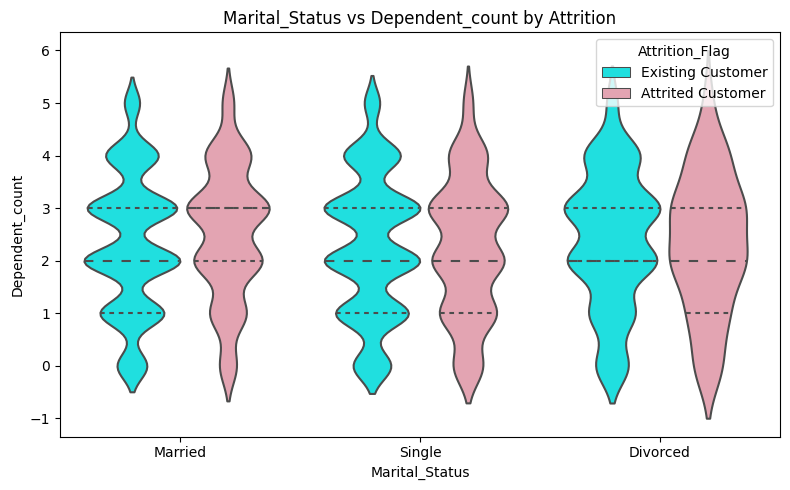

In [ ]:
my_pal = {"Attrited Customer": "#EE99AC", "Existing Customer": "cyan"}
plot_violinpal(data=df, x='Marital_Status', y='Dependent_count',hue='Attrition_Flag',split=False, palette=my_pal)

* Married customers have more dependents.

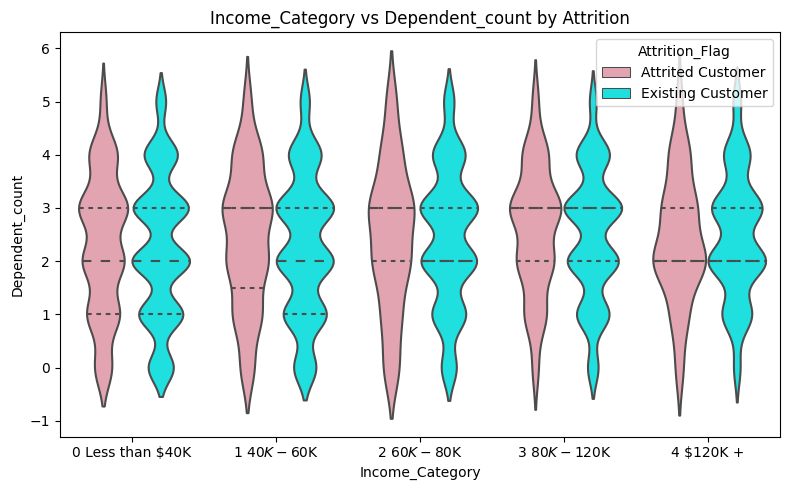

In [ ]:
# creating a dictionary with one specific color per group:
my_pal = {"Attrited Customer": "#EE99AC", "Existing Customer": "cyan"}
plot_violinpal(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Dependent_count',hue='Attrition_Flag',split=False,palette=my_pal)

* Lesser income credit card customers with more dependents exit the company. Dependents add expense, so perhaps searching for better deals.

### **EDA for Total Number of Relationships with Credit Card Provider**

---

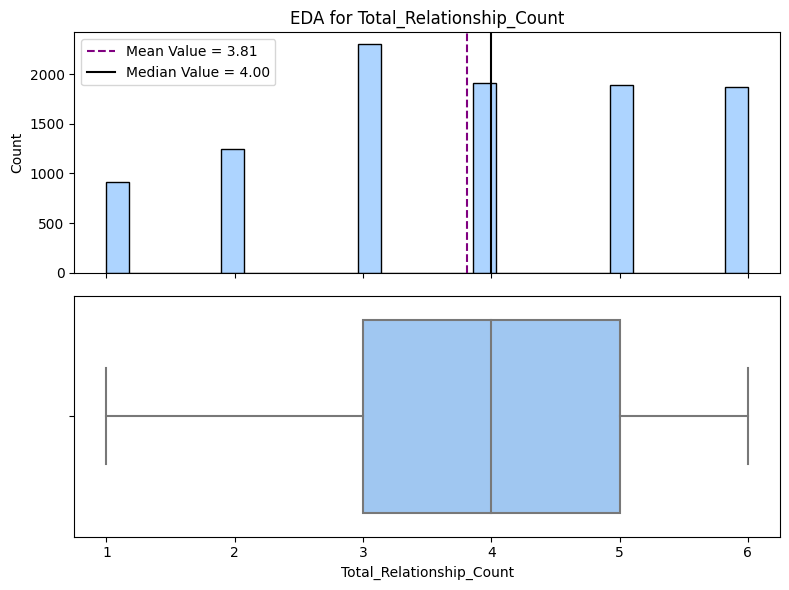

In [ ]:
plot_numeric(df,'Total_Relationship_Count')

* A range from 1 to 6 relationships between bank customers and the credit card provider is a reasonable range.

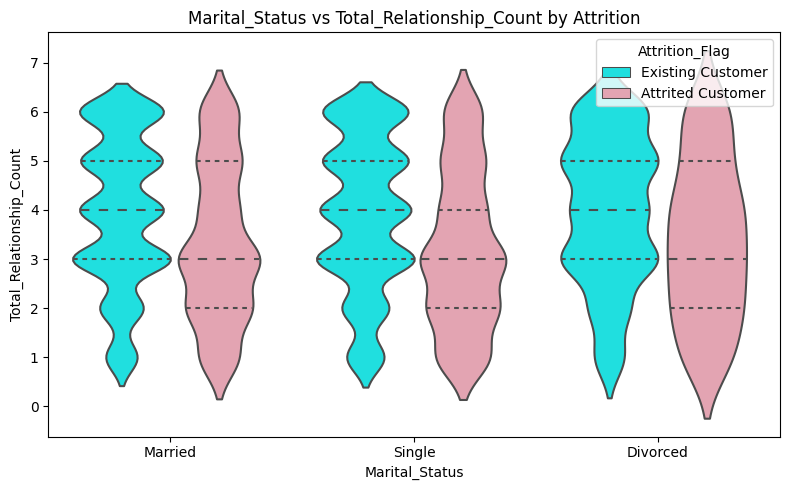

In [ ]:
my_pal = {"Attrited Customer": "#EE99AC", "Existing Customer": "cyan"}
plot_violinpal(data=df, x='Marital_Status', y='Total_Relationship_Count',hue='Attrition_Flag',split=False, palette=my_pal)

* Existing customers have more relationships with credit card company.

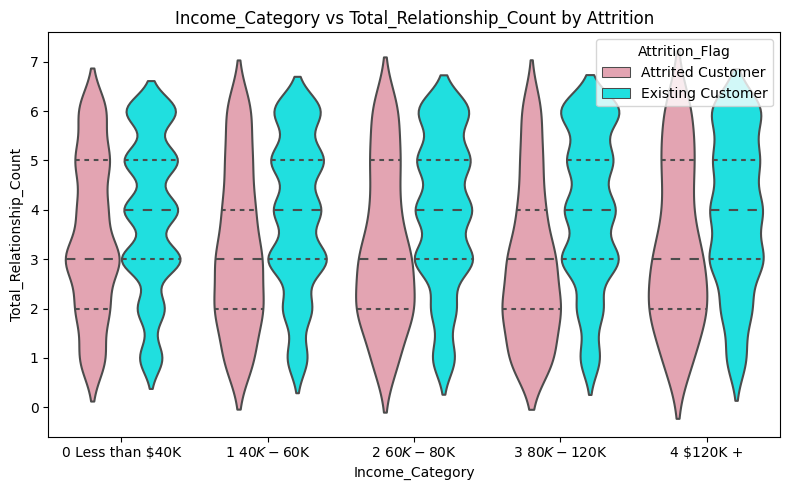

In [ ]:
# creating a dictionary with one specific color per group:
my_pal = {"Attrited Customer": "#EE99AC", "Existing Customer": "cyan"}
plot_violinpal(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Total_Relationship_Count',hue='Attrition_Flag',split=False,palette=my_pal)

* Existing customers have more relationships with credit card company across incomes as well.

### **EDA for Number of Months Bank Customer was Inactive in Last 12 Months**

---

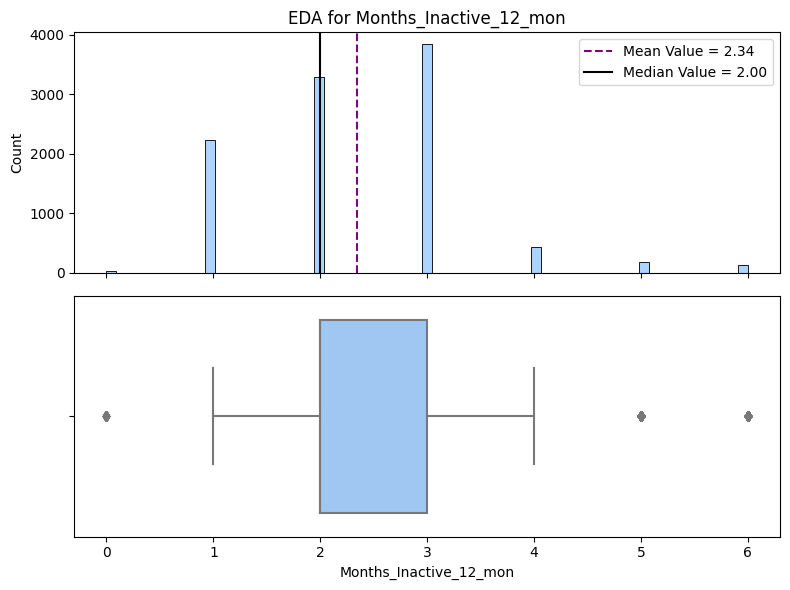

In [ ]:
plot_numeric(df,'Months_Inactive_12_mon')

* Bank customers not active between 0 and 6 months is a reasonable range.

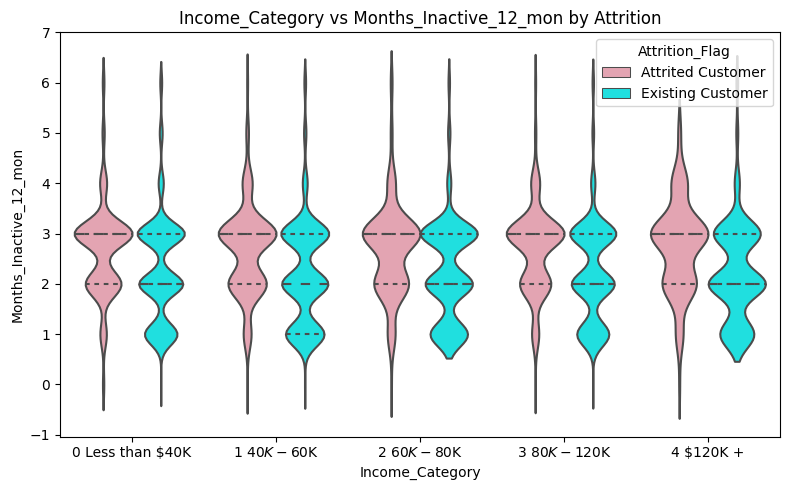

In [ ]:
# creating a dictionary with one specific color per group:
my_pal = {"Attrited Customer": "#EE99AC", "Existing Customer": "cyan"}
plot_violinpal(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Months_Inactive_12_mon',hue='Attrition_Flag',split=False,palette=my_pal)

* Credit card customers more inactive for months are more likely to exit credit card across incomes.

### **EDA for Number of Contacts Bank Customer had with Bank in Last 12 Months**

---

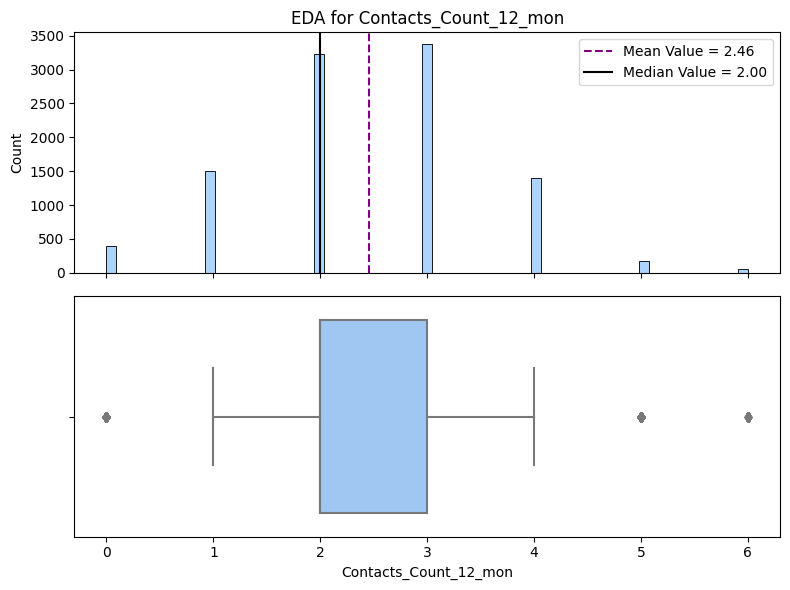

In [ ]:
plot_numeric(df,'Contacts_Count_12_mon')

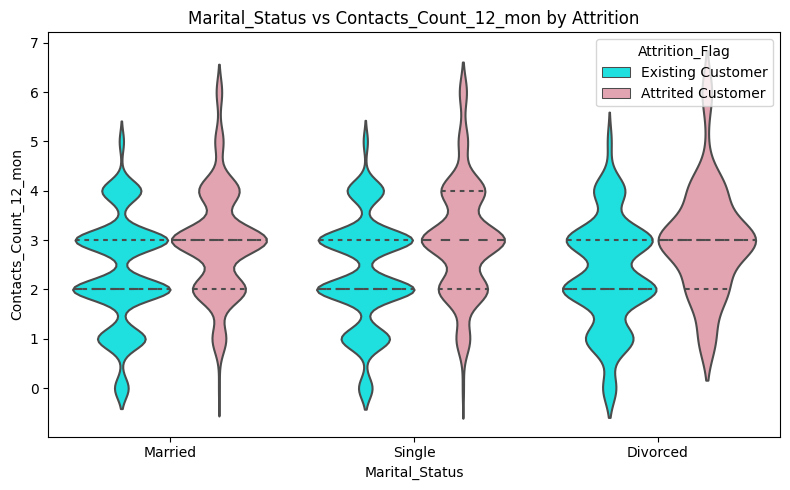

In [ ]:
my_pal = {"Attrited Customer": "#EE99AC", "Existing Customer": "cyan"}
plot_violinpal(data=df, x='Marital_Status', y='Contacts_Count_12_mon',hue='Attrition_Flag',split=False, palette=my_pal)

* Contacts with credit card company result in attrition.

### **EDA for Credit Limit**

---

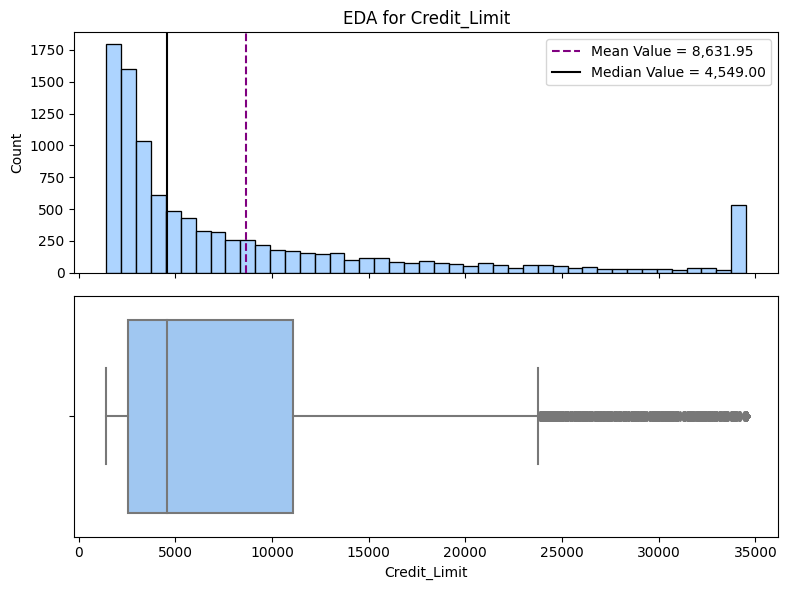

In [ ]:
plot_numeric(df,'Credit_Limit')

* The Credit limit may correspond to the limit for the Blue Card Category, given it is the majority Card category.
* The Higher limits may relate to the higher income card categories.

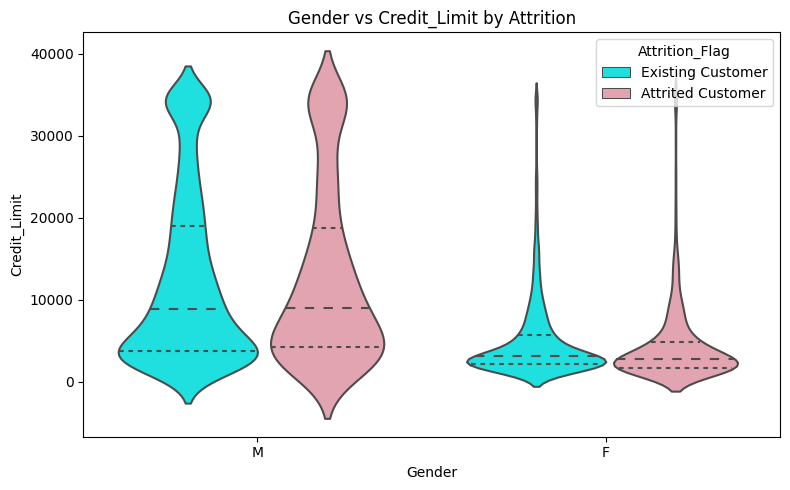

In [ ]:
plot_violinpal(data=df, x='Gender', y='Credit_Limit',hue='Attrition_Flag',split=False, palette=my_pal)

* Women have lower credit limits.
* Both not utilizing credit ($0 balance) exit credit card company.

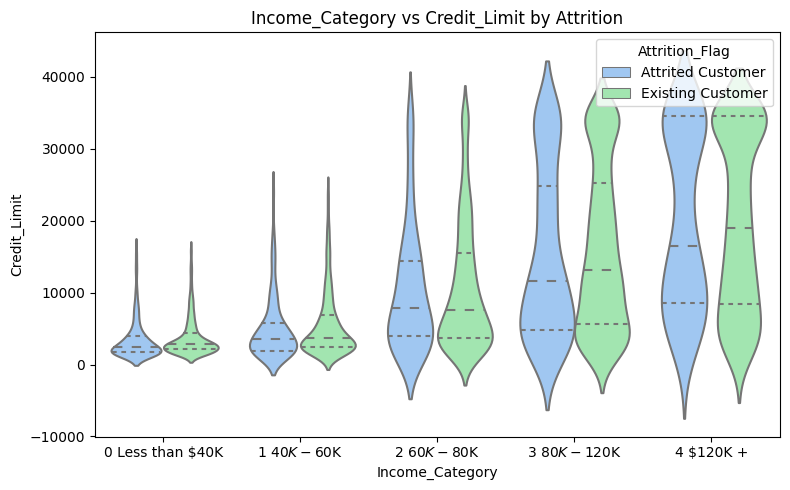

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Credit_Limit',hue='Attrition_Flag',split=False)

* Customers using less credit tend to leave credit card company across incomes.

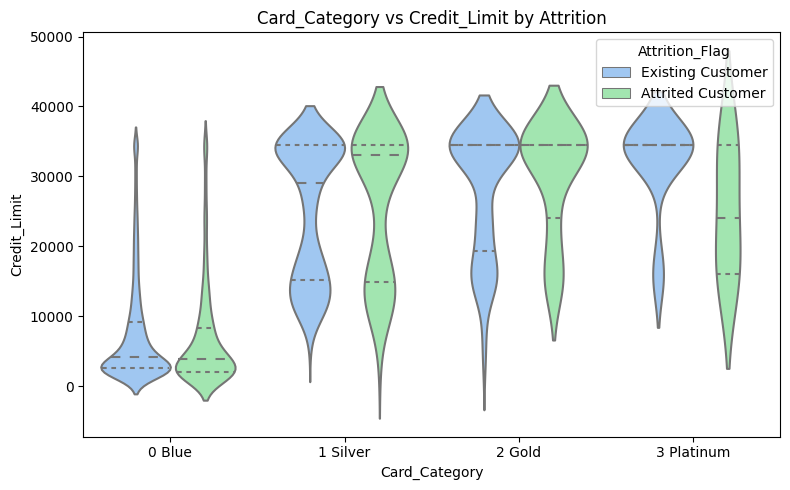

In [ ]:
plot_violin(data=df.sort_values(by='Card_Category'), x='Card_Category', y='Credit_Limit',hue='Attrition_Flag',split=False)

* Blue customers not using credit (majority of dataset) tend to leave credit card company.
* Silver, Gold, & Platinum customers utilizing more credit also exit credit card company.

### **EDA for Total Revolving Balance**

---

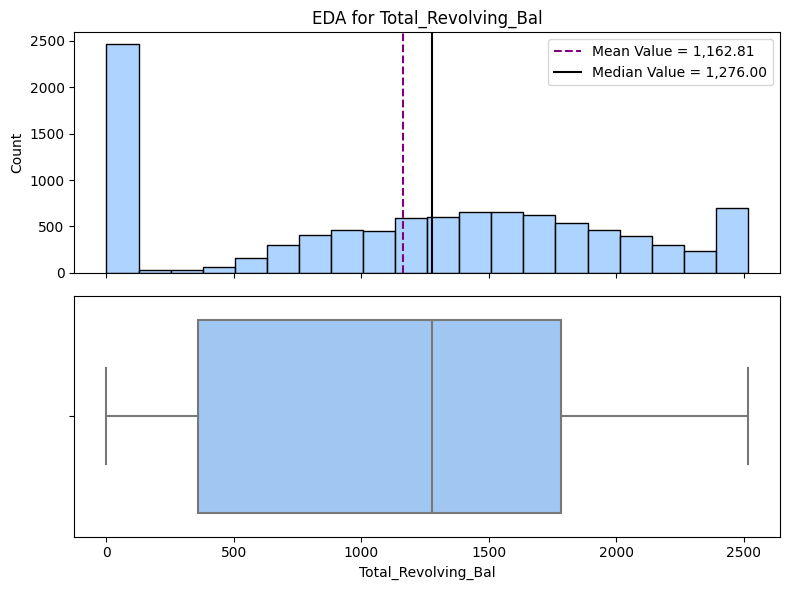

In [ ]:
plot_numeric(df,'Total_Revolving_Bal')

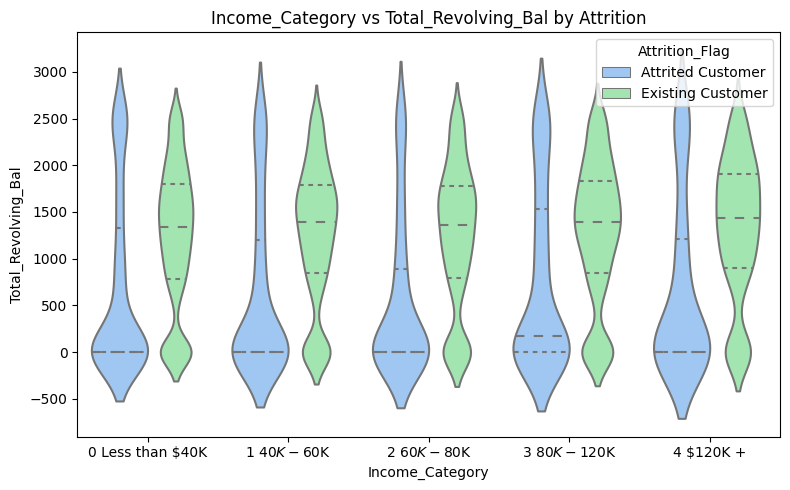

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Total_Revolving_Bal',hue='Attrition_Flag',split=False)

* Credit card customers who do not carry a balance tend to exit the credit card.
* Higher Total Revolving Balances have more attrition.

### **EDA for Average Open to Buy Ratio**

---

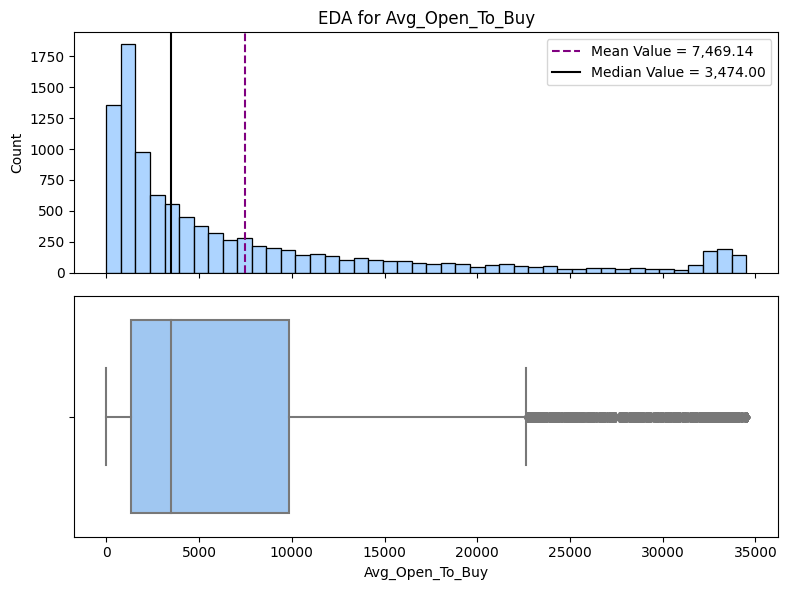

In [ ]:
plot_numeric(df,'Avg_Open_To_Buy')

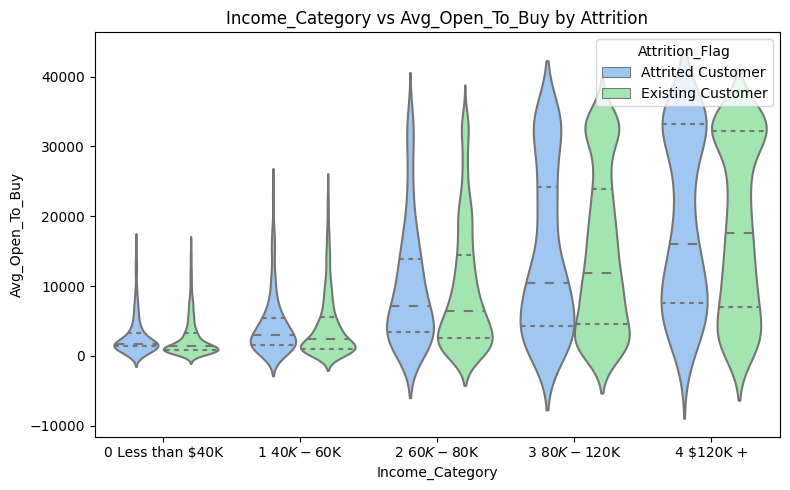

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Avg_Open_To_Buy',hue='Attrition_Flag',split=False)

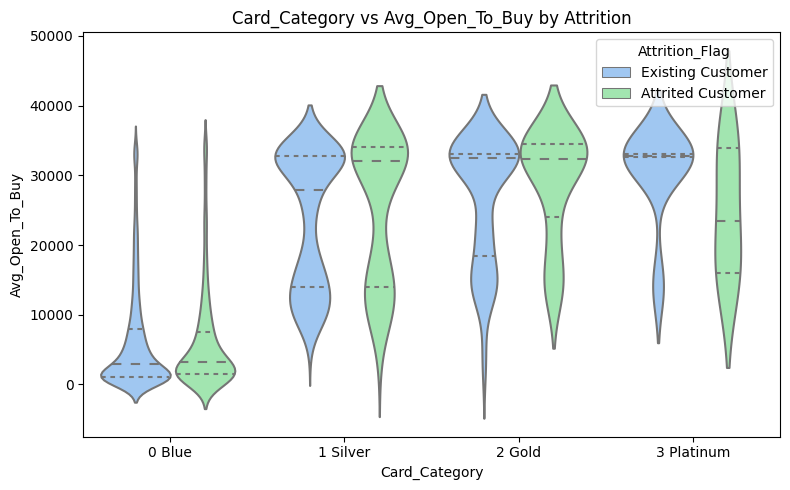

In [ ]:
plot_violin(data=df.sort_values(by='Card_Category'), x='Card_Category', y='Avg_Open_To_Buy',hue='Attrition_Flag',split=False)

####  **Average Open to Buy** : The difference between the credit limit assigned to a cardholder account and the present balance on the account.
* Silver, Gold, & Platinum members with more Avg amount open to buy exit the credit card company.

### **EDA for Average Utilization Ratio**

---

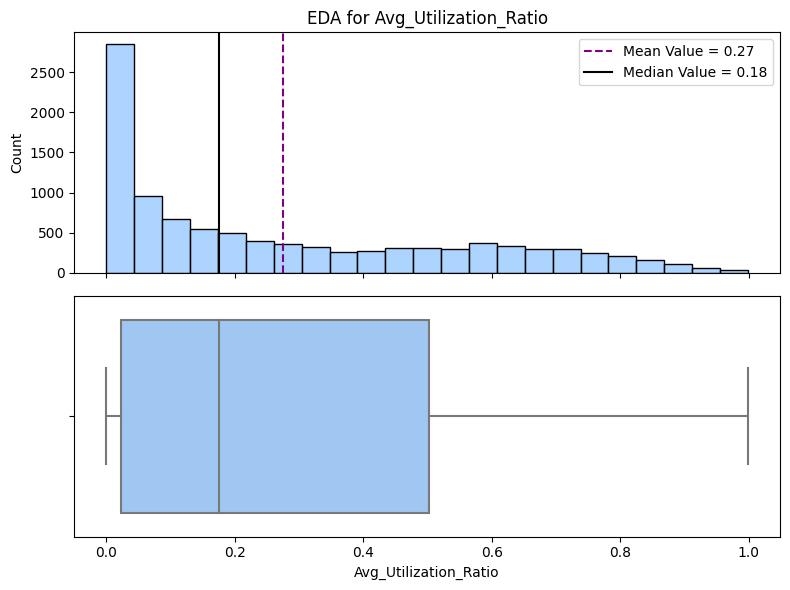

In [ ]:
plot_numeric(df,'Avg_Utilization_Ratio')

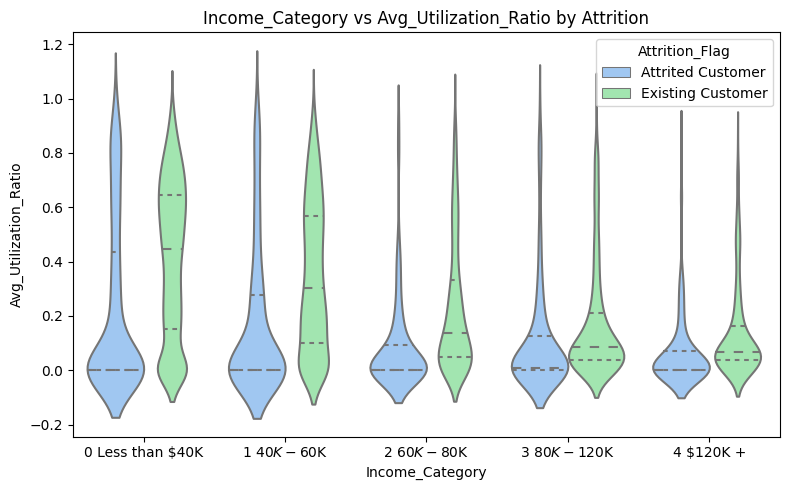

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Avg_Utilization_Ratio',hue='Attrition_Flag',split=False)

* Credit card customers not utilizing card exit company.

## **Categorical EDA**

---



In [ ]:
# create function to plot a Countplot with hue of bank customers who churned
def plot_count(data,x,hue,figsize=(10,5)):
  # sets the figure size
  fig, ax = plt.subplots(figsize=figsize)
  
  # determine the value counts for each category, sort in descending order
  #counts = df[x].value_counts().sort_values(ascending=False).to_frame()

  # plot barplot
  sns.countplot(data=data, x=x, hue=hue,ax=ax)

  # show x axis labels at 0 degrees so don't run together
  plt.xticks(rotation=0)
  # set title, x axis , & y axis
  ax.set_title(f'Bank Customer Attrition By {x}',fontsize=20, fontweight='bold');
  ax.set_xlabel(f'{x}', fontsize=15, fontweight = 'bold')
  ax.set_ylabel('Counts',fontsize=15, fontweight='bold')
  
  return fig,ax

In [ ]:
# find numerical column names
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

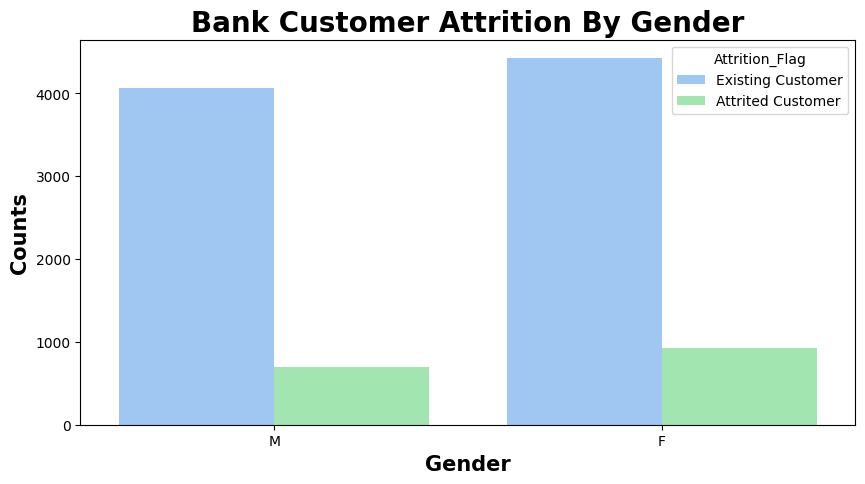

F    0.529081
M    0.470919
Name: Gender, dtype: float64


In [ ]:
# plot Gender by Attrition Flag
fig, ax = plot_count(df, x='Gender',hue='Attrition_Flag');
plt.show()
print(df['Gender'].value_counts(normalize=True))

* Split of men to women who exited bank seems fairly balanced.

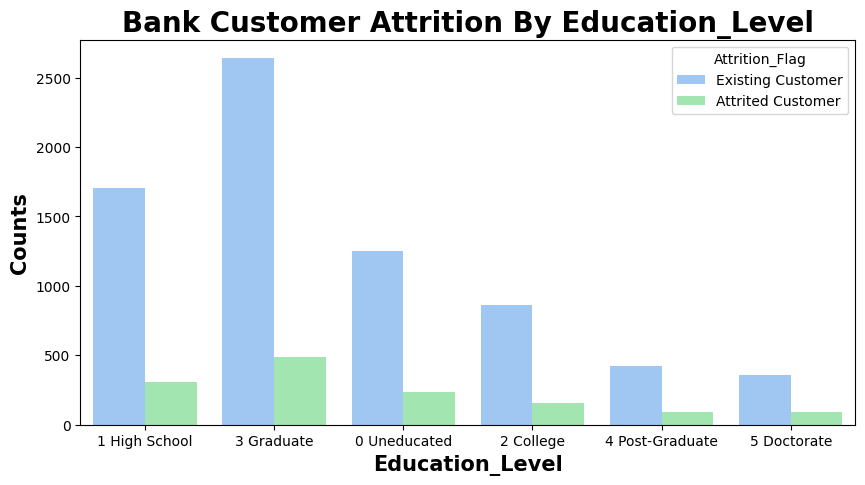

3 Graduate         0.363383
1 High School      0.233852
0 Uneducated       0.172746
2 College          0.117681
4 Post-Graduate    0.059944
5 Doctorate        0.052393
Name: Education_Level, dtype: float64


In [ ]:
# plot Education Level by Attrition Flag
fig, ax = plot_count(df, x='Education_Level',hue='Attrition_Flag');
plt.show()
print(df['Education_Level'].value_counts(normalize=True))

* Attrition of bank customers also appears not affected by Education Level.

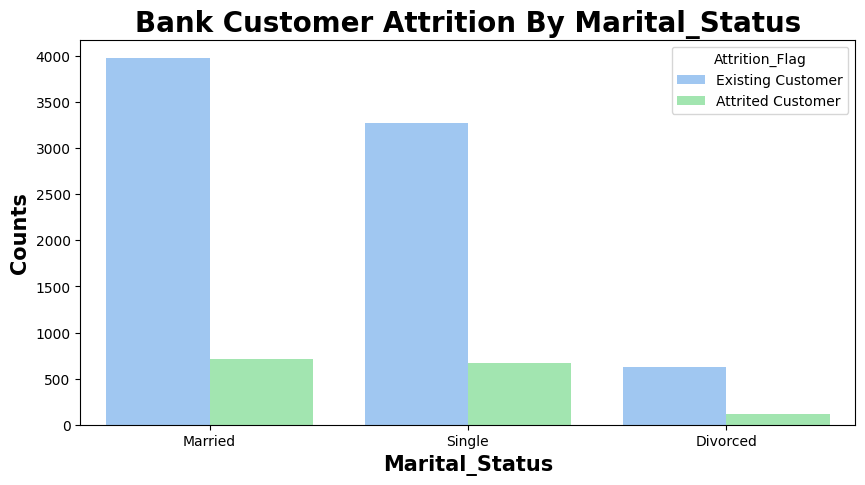

Married     0.499787
Single      0.420452
Divorced    0.079761
Name: Marital_Status, dtype: float64


In [ ]:
# plot Marital Status by Attrition Flag
fig, ax = plot_count(df, x='Marital_Status',hue='Attrition_Flag');
plt.show()
print(df['Marital_Status'].value_counts(normalize=True))

* Look into whether Divorced seems to affect bank churn.

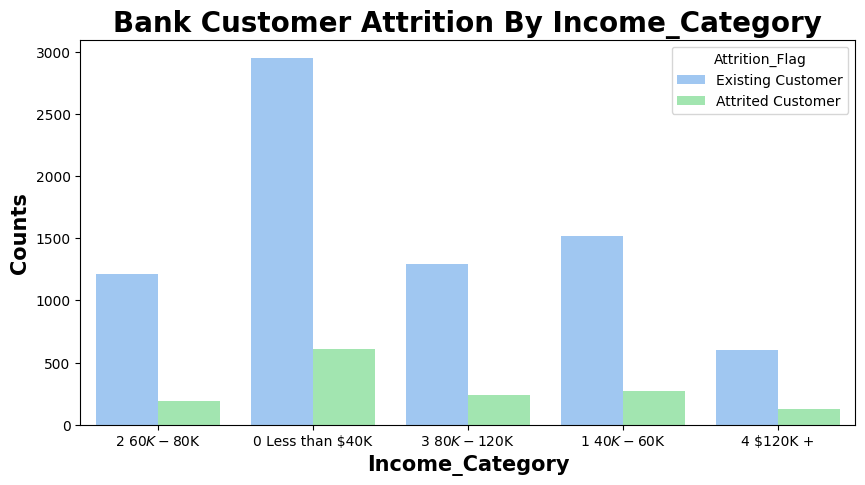

0 Less than $40K    0.395008
1 $40K - $60K       0.198558
3 $80K - $120K      0.170272
2 $60K - $80K       0.155519
4 $120K +           0.080643
Name: Income_Category, dtype: float64


In [ ]:
# plot Income Category by Attrition Flag
fig, ax = plot_count(df, x='Income_Category',hue='Attrition_Flag');
plt.show()
print(df['Income_Category'].value_counts(normalize=True))

* Income category does not seem to correlate with bank churn.

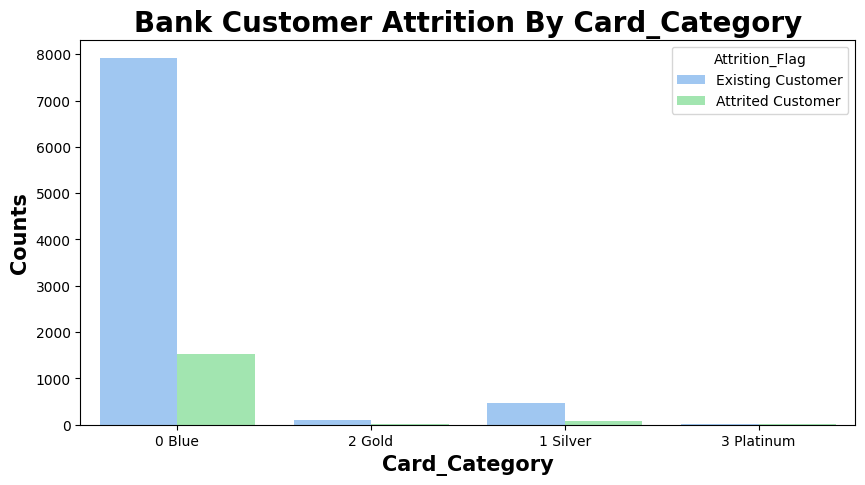

0 Blue        0.931767
1 Silver      0.054804
2 Gold        0.011455
3 Platinum    0.001975
Name: Card_Category, dtype: float64


In [ ]:
# plot Card Category by Attrition Flag
fig, ax = plot_count(df, x='Card_Category',hue='Attrition_Flag');
plt.show()
print(df['Card_Category'].value_counts(normalize=True))

* The Blue Credit Card is the predominant card category, and reflects amount, not correlation to bank churn.
<br />
<br />
<br />

# **Multi-variate EDA & Explanatory Data Analysis: Part 3** <a name = "Multi-variate EDA & Explanatory Data Analysis: Part 3">

---


## **Assignment: Part 3**

*(Note: You are not clustering your data for this assignment.)*

1. For this part of the project, you will continue your data exploration by:
   *  Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

   * Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience. ***(Neither of these should be histograms, boxplots, or correlation plots)***.
   * These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions.  They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

### **1 Correlation Heatmap**

In [ ]:
num_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<ipython-input-75-b52ea00fe4be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Purples');


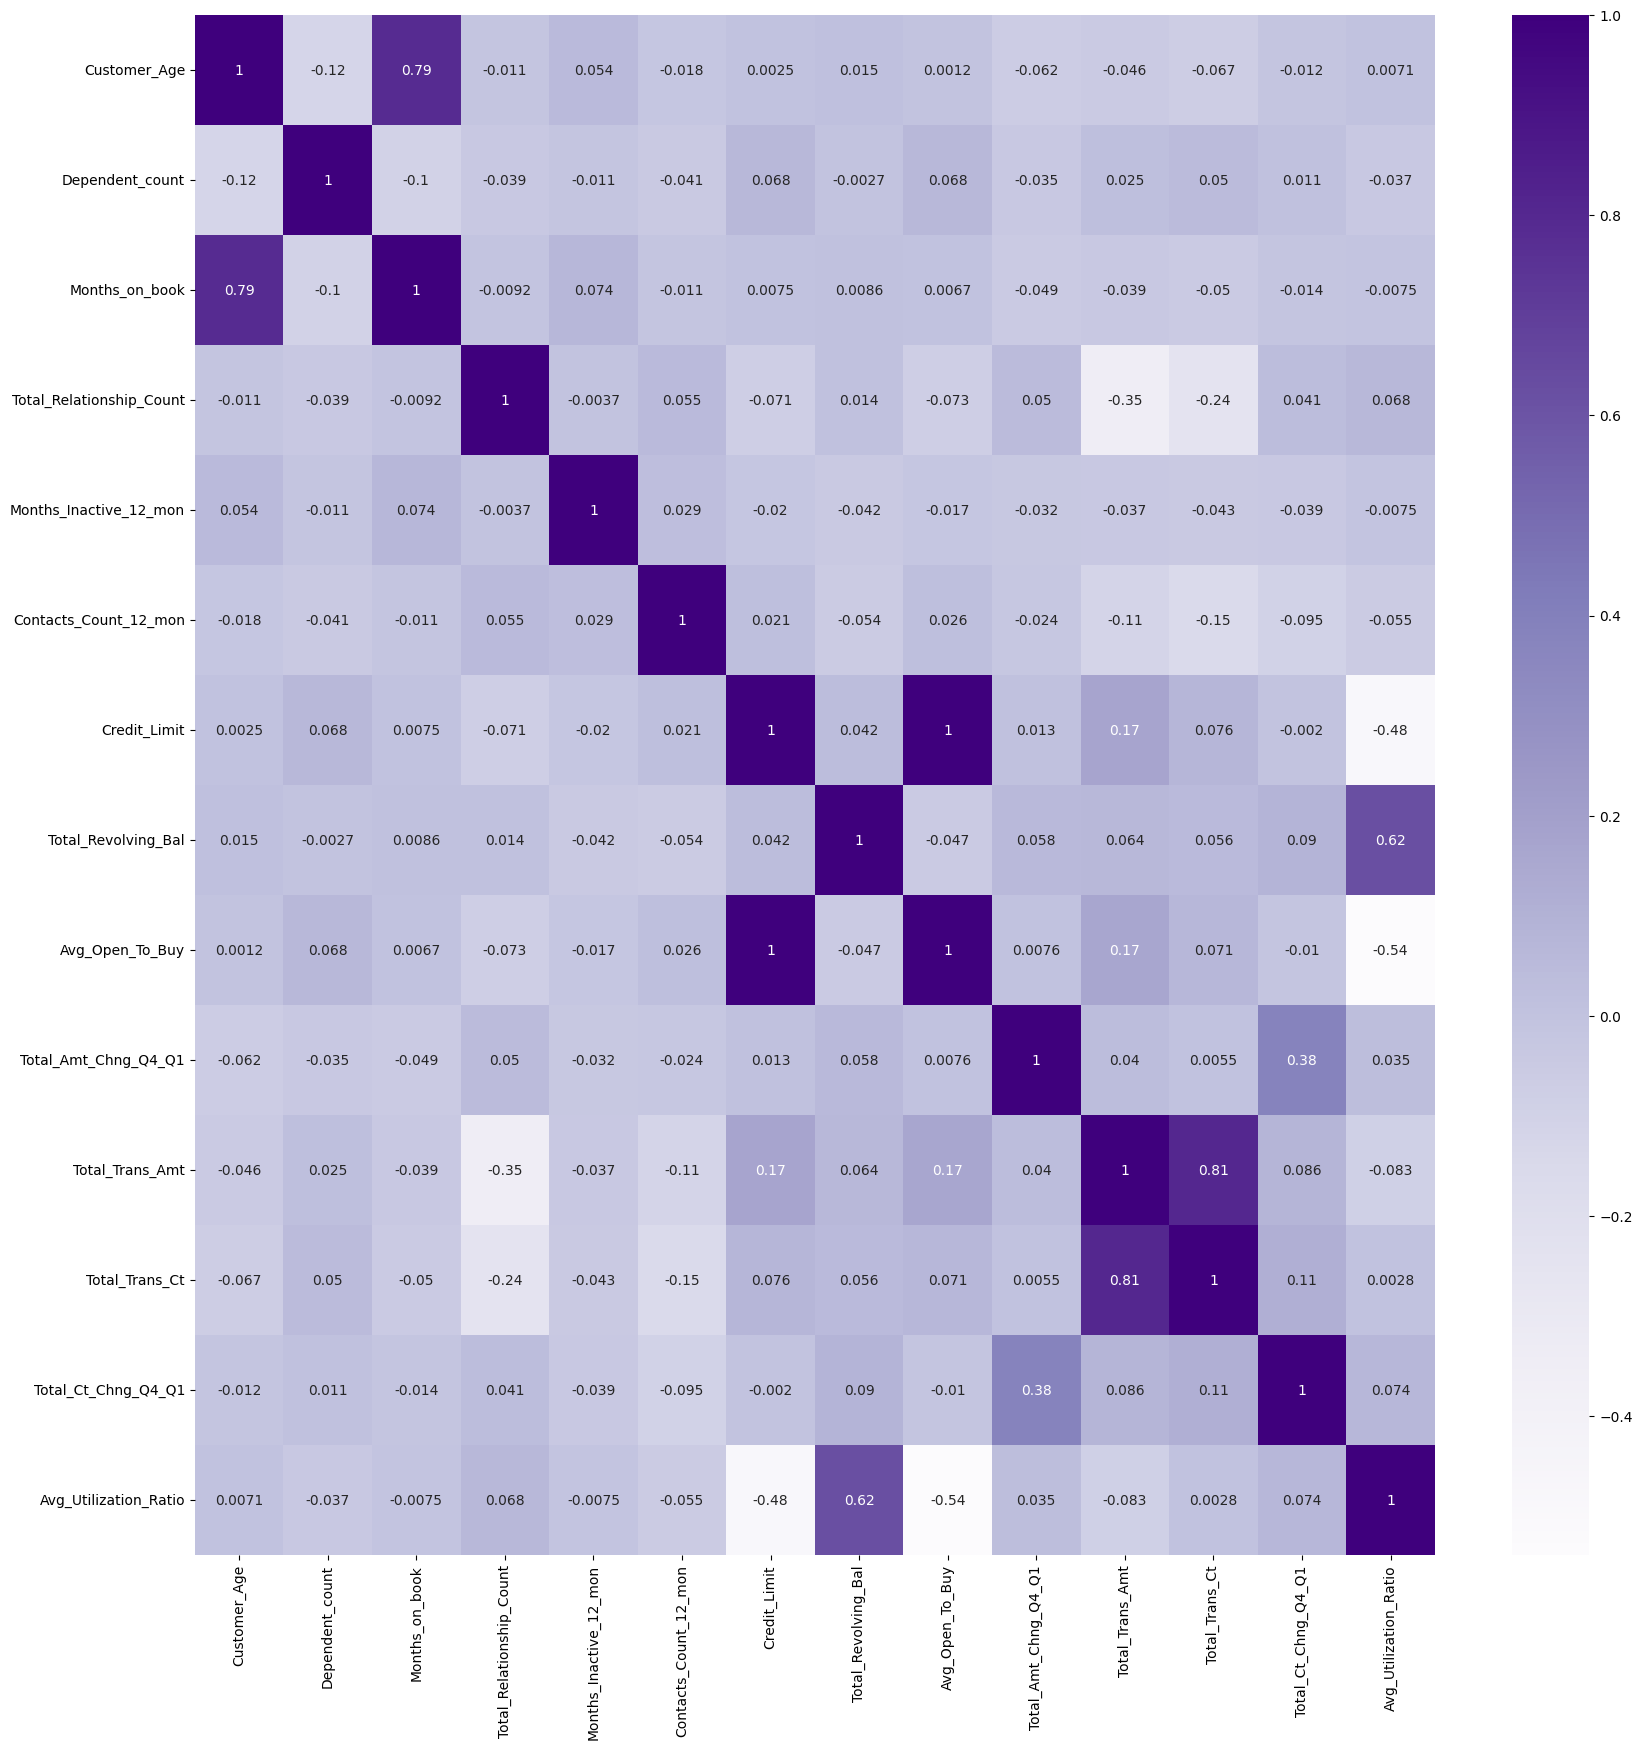

In [ ]:
fig, axes = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Purples');

* #### 1 Average Utilization Ratio and Total Revolving Balance have a strong correlation.
* #### 2 Average Dollar Amount Available to Buy Ratio and Average Utilization Ratio have a moderately strong correlation.
* #### 3 Credit Limit and Average Utilization Ratio have a moderately strong correlation.

### **1 Average Utilization Ratio vs Total Revolving Balance**

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

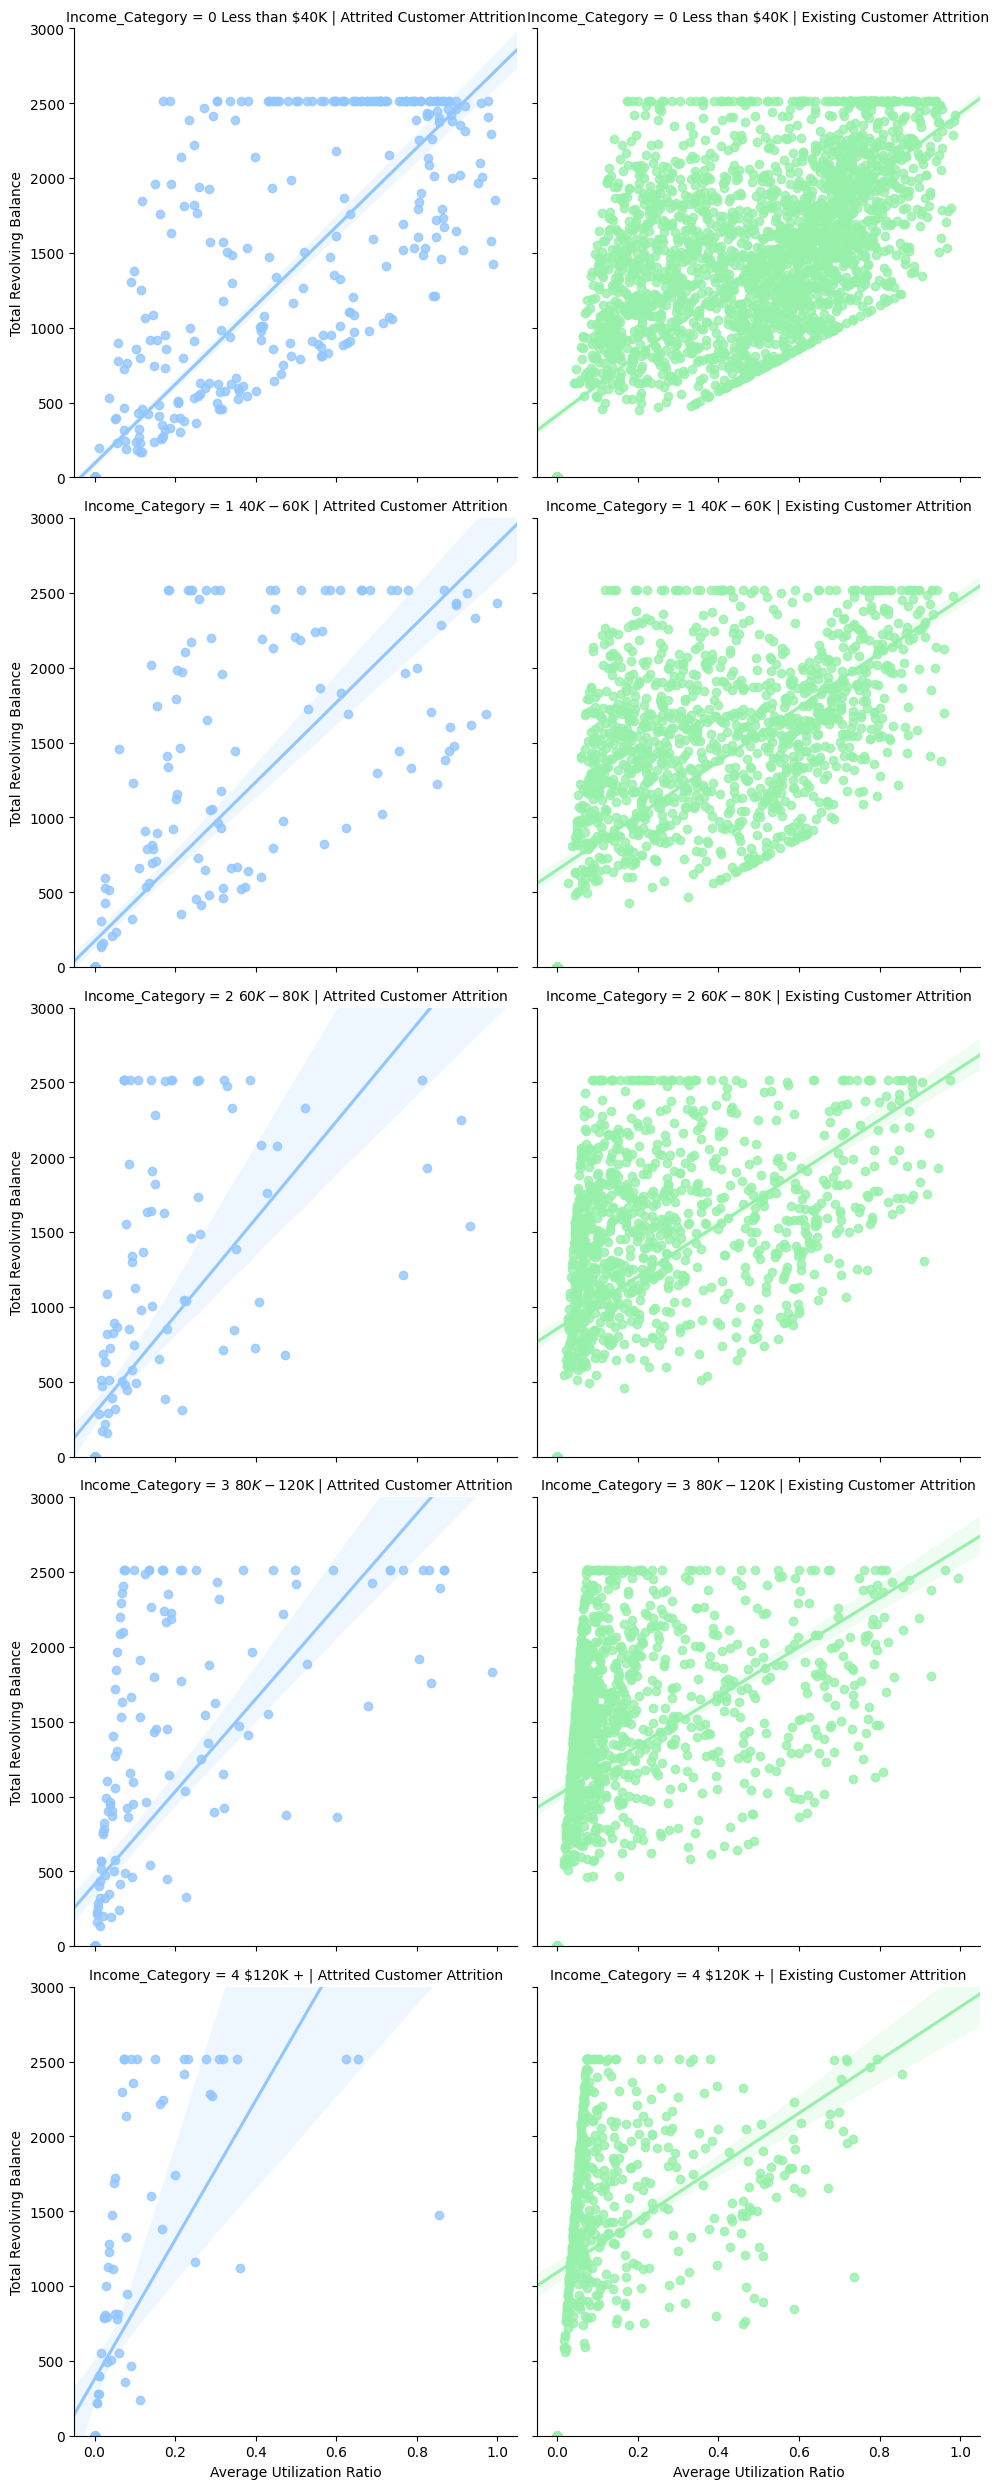

In [ ]:
g = sns.lmplot(data=df.sort_values(by='Income_Category'),x='Avg_Utilization_Ratio',  y='Total_Revolving_Bal',hue='Attrition_Flag', col='Attrition_Flag', row='Income_Category',truncate=False);
g.set_titles(col_template='{col_name} Attrition');
g.set_ylabels('Total Revolving Balance');
g.set_xlabels('Average Utilization Ratio');
plt.ylim(0, 3000);

(0.0, 3000.0)

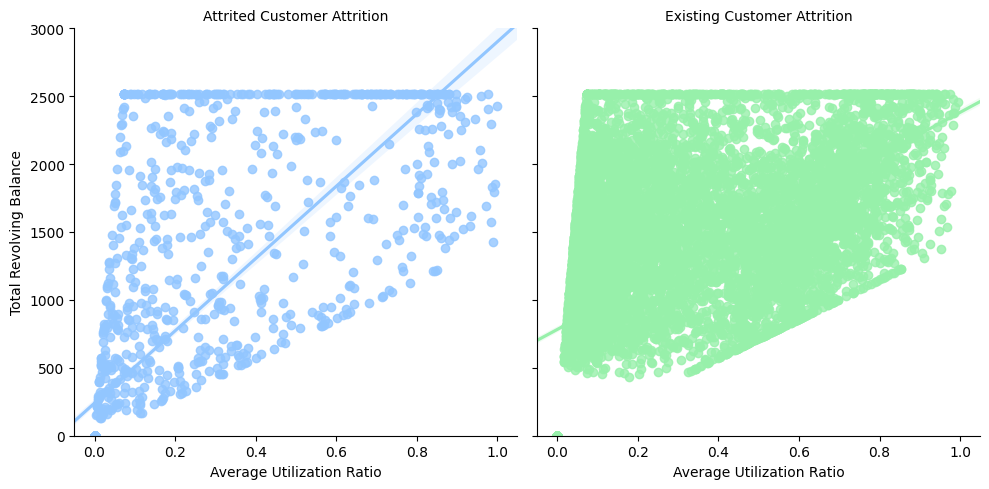

In [ ]:
i = sns.lmplot(data=df.sort_values(by='Income_Category'),x='Avg_Utilization_Ratio',  y='Total_Revolving_Bal',hue='Attrition_Flag', col='Attrition_Flag',truncate=False);
i.set_titles(col_template='{col_name} Attrition');
i.set_ylabels('Total Revolving Balance');
i.set_xlabels('Average Utilization Ratio');
plt.ylim(0,3000)

### **2 Average Dollar Amount Available to Buy Ratio vs. Average Utilization Ratio**

In [ ]:
# group average utilization ratio by income category
attrition_income_df = attrition_df.groupby('Income_Category').mean().reset_index()
attrition_income_df


<ipython-input-79-03a56d5c93e7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  attrition_income_df = attrition_df.groupby('Income_Category').mean().reset_index()


Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
2                  3.243386                2.693122               3.000000   
3                  2.913223                2.698347               2.962810   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
2  10491.971958           569.201058      9922.770899              0.705540   
3  15296.733058           758.619835     14538.113223              0.712215   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0      2865.243464       44.196078             0.543116               0.224935  
1      2992.726937       44.612546             0.559214               0.173985  
2      3246.380952       44.835979             0.575688               0.086090  
3      3740.615702       47.471074             0.578798               0.111640  
4      3393.071429       45.650794             0.557754               0.064532

In [ ]:
existing_income_df = attrition_df.groupby('Income_Category').mean().reset_index()
existing_income_df

<ipython-input-80-5e4e4657932f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  existing_income_df = attrition_df.groupby('Income_Category').mean().reset_index()


Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
2                  3.243386                2.693122               3.000000   
3                  2.913223                2.698347               2.962810   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
2  10491.971958           569.201058      9922.770899              0.705540   
3  15296.733058           758.619835     14538.113223              0.712215   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0      2865.243464       44.196078             0.543116               0.224935  
1      2992.726937       44.612546             0.559214               0.173985  
2      3246.380952       44.835979             0.575688               0.086090  
3      3740.615702       47.471074             0.578798               0.111640  
4      3393.071429       45.650794             0.557754               0.064532

In [ ]:
attrition_income_df = attrition_income_df.sort_values(by='Avg_Utilization_Ratio',ascending=False)
attrition_income_df

Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
3                  2.913223                2.698347               2.962810   
2                  3.243386                2.693122               3.000000   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
3  15296.733058           758.619835     14538.113223              0.712215   
2  10491.971958           569.201058      9922.770899              0.705540   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0      2865.243464       44.196078             0.543116               0.224935  
1      2992.726937       44.612546             0.559214               0.173985  
3      3740.615702       47.471074             0.578798               0.111640  
2      3246.380952       44.835979             0.575688               0.086090  
4      3393.071429       45.650794             0.557754               0.064532

In [ ]:
existing_income_df = attrition_income_df.sort_values(by='Avg_Utilization_Ratio',ascending=False)
existing_income_df

Income_Category  Customer_Age  Dependent_count  Months_on_book  \
0  0 Less than $40K     46.428105         2.318627       36.039216   
1     1 $40K - $60K     45.981550         2.439114       35.774908   
3    3 $80K - $120K     47.033058         2.586777       36.322314   
2     2 $60K - $80K     46.301587         2.449735       36.074074   
4         4 $120K +     47.873016         2.428571       36.849206   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  3.468954                2.678105               2.877451   
1                  3.239852                2.682657               3.099631   
3                  2.913223                2.698347               2.962810   
2                  3.243386                2.693122               3.000000   
4                  3.246032                2.746032               2.960317   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   3483.306536           686.114379      2797.192157              0.686773   
1   5049.799262           634.745387      4415.053875              0.677406   
3  15296.733058           758.619835     14538.113223              0.712215   
2  10491.971958           569.201058      9922.770899              0.705540   
4  19734.380952           677.833333     19056.547619              0.703619   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0      2865.243464       44.196078             0.543116               0.224935  
1      2992.726937       44.612546             0.559214               0.173985  
3      3740.615702       47.471074             0.578798               0.111640  
2      3246.380952       44.835979             0.575688               0.086090  
4      3393.071429       45.650794             0.557754               0.064532

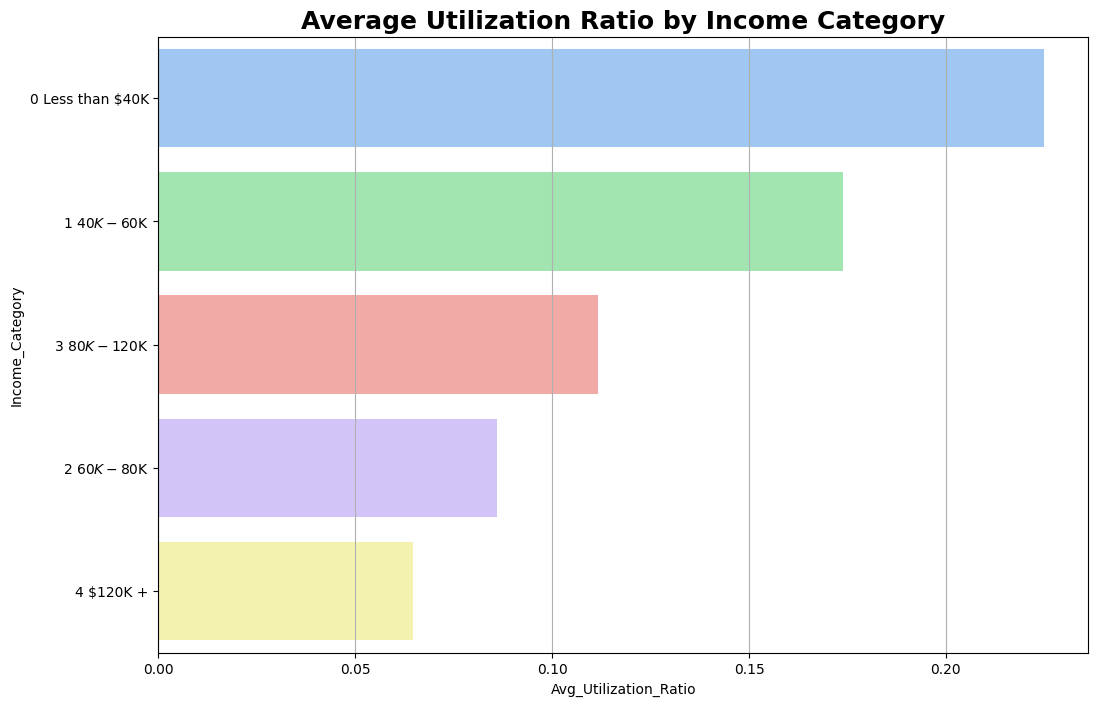

In [ ]:
# plot a bar plot showing average utilization ratio by income category
plt.figure(figsize=(12,8))
sns.barplot(data=attrition_income_df,x='Avg_Utilization_Ratio', y='Income_Category');
plt.title('Average Utilization Ratio by Income Category',fontsize=18,fontweight='bold');
plt.grid(axis='x');

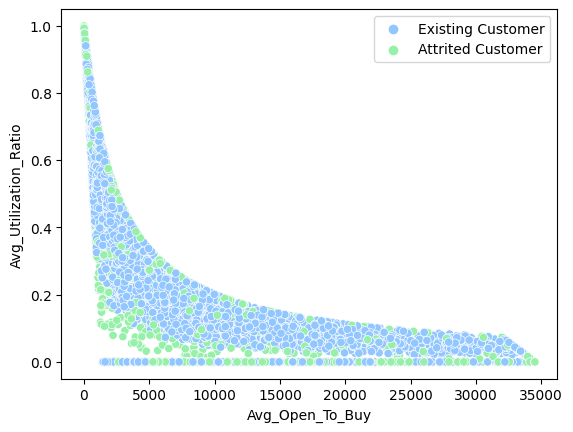

In [ ]:
sns.scatterplot(data = df, x = 'Avg_Open_To_Buy', y = 'Avg_Utilization_Ratio', hue = 'Attrition_Flag')
plt.legend();

### **3 Credit Limit and Average Utilization Ratio**

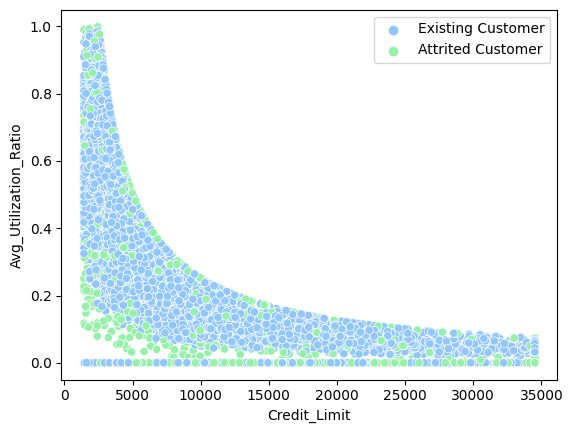

In [ ]:
sns.scatterplot(data = df, x = 'Credit_Limit', y = 'Avg_Utilization_Ratio', hue = 'Attrition_Flag')
plt.legend();

## **Explanatory Visuals & Analysis : Part 3**

<br />

### **1 Average Utilization Ratio vs Total Revolving Balance**

<Figure size 1200x800 with 0 Axes>

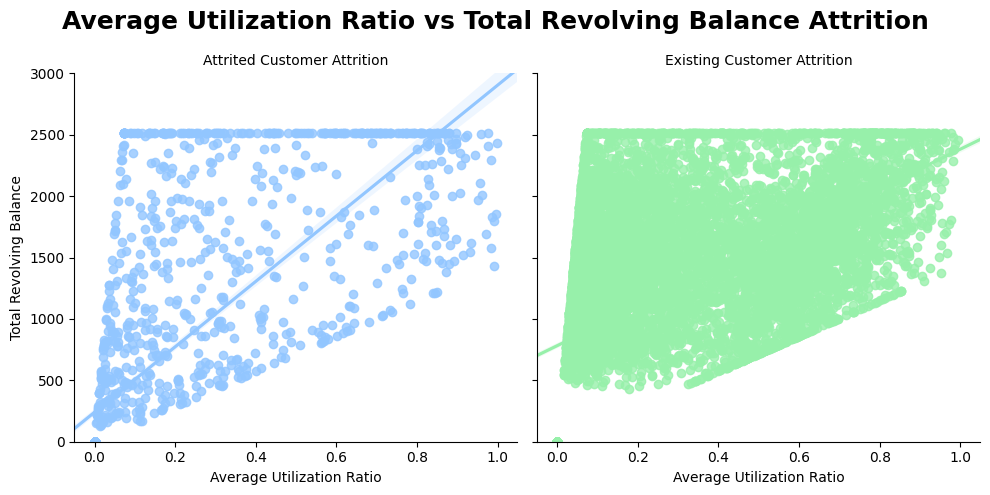

In [ ]:
plt.figure(figsize=(12,8))
i = sns.lmplot(data=df.sort_values(by='Income_Category'),x='Avg_Utilization_Ratio',  y='Total_Revolving_Bal',hue='Attrition_Flag', col='Attrition_Flag',truncate=False);
i.set_titles(col_template='{col_name} Attrition');
i.set_ylabels('Total Revolving Balance');
i.set_xlabels('Average Utilization Ratio');
plt.ylim(0,3000)
i.fig.suptitle('Average Utilization Ratio vs Total Revolving Balance Attrition',fontsize=18,fontweight='bold');
plt.tight_layout();

* ### As Average Utilization Ratio for credit card customers increases toward the maximum Total Revolving Balance, there is more attrition.
* ### There is a strong positive correlation between Average Utilization Ratio and Total Revolving Balance.

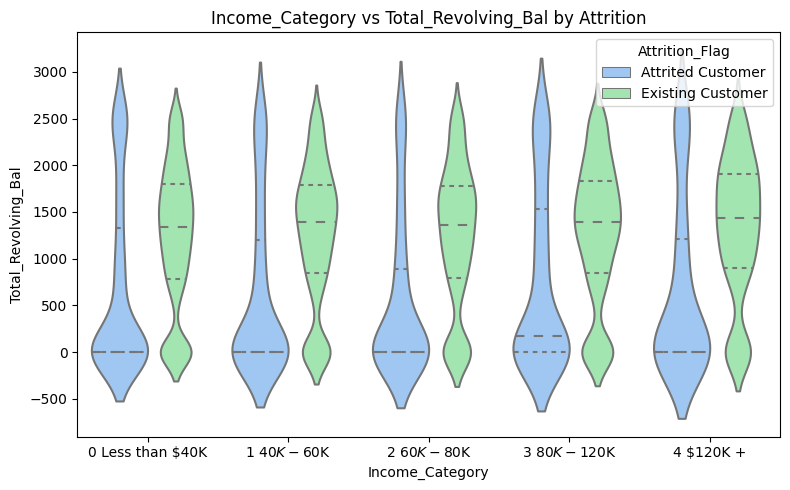

In [ ]:
plot_violin(data=df.sort_values(by='Income_Category'), x='Income_Category', y='Total_Revolving_Bal',hue='Attrition_Flag',split=False)

* ### Credit card customers with $0 balance tend to exit the credit card company.
* ### Credit card customers with a range of total revolving balance leave credit card, with slight bubble at maximum Total Revolving Balance.

<br />

### **2 Average Dollar Amount Available to Buy Ratio vs. Average Utilization Ratio**

Text(0.5, 0, 'Average Dollar Amount ($) Available to Buy')

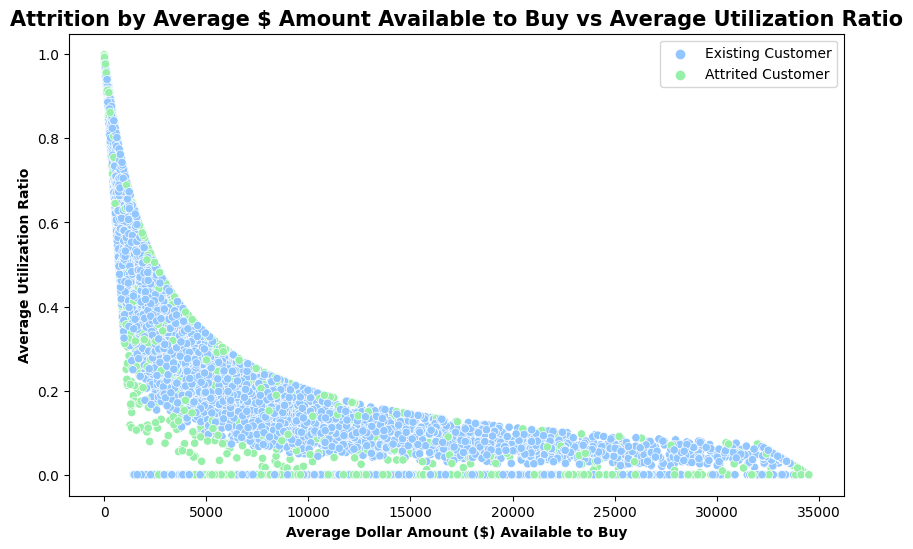

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'Avg_Open_To_Buy', y = 'Avg_Utilization_Ratio', hue = 'Attrition_Flag')
plt.legend();
plt.title('Attrition by Average $ Amount Available to Buy vs Average Utilization Ratio',fontsize=15,fontweight='bold');
plt.ylabel('Average Utilization Ratio', fontsize=10, fontweight='bold');
plt.xlabel('Average Dollar Amount ($) Available to Buy', fontsize=10, fontweight='bold')

### **Average Open to Buy** : The difference between the credit limit assigned to a cardholder account and the present balance on the account.
* ### Credit card Customers using less credit available have more credit available to purchase, yet choose to exit the credit card company.
* ### Incentiving those with higher average dollars available to buy could decrease attrition from the credit card company.

<br />

### **3 Credit Limit and Average Utilization Ratio**

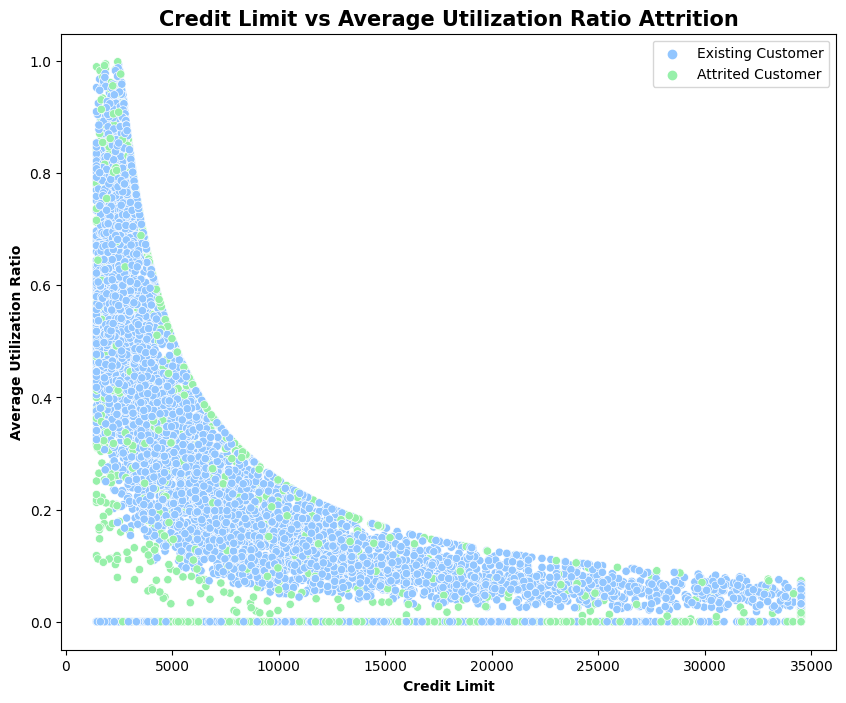

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = 'Credit_Limit', y = 'Avg_Utilization_Ratio', hue = 'Attrition_Flag')
plt.legend();
plt.title('Credit Limit vs Average Utilization Ratio Attrition',fontsize=15,fontweight='bold');
plt.ylabel('Average Utilization Ratio', fontsize=10, fontweight='bold');
plt.xlabel('Credit Limit', fontsize=10, fontweight='bold');

* ### Credit Limit is inversely proportional to Average Utilization Ratio.
* ### Credit card customers who use less credit and have higher credit limits tend to leave the credit card company. These customers have better credit, thus may be tempted by rival companies with better deals.

<br />
<br />


# **Model Development: Part 4** <a name = "Model Development: Part 4">

---


## **Assignment: Part 4**

* Ensure that you complete the appropriate pre-processing steps.
* Fit and evaluate multiple types of models on your data.
    * Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
    * Use **GridSearchCV** to tune some of the hyperparameters of each model.
    * Display the metrics of your best tuned version of each model type.
* Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. 
    *  We encourage you to try multiple techniques depending on your data!
*  Choose your "production" model and justify this decision using the metrics most important to your business problem.
*  Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).

### **Readme**

---


*  Create a README.md file in your GitHub repository.  This README should include:
   *  Your business problem and stakeholders
   *  The source of your data
   *  A description of your data
   *  2 analytical insights from your data analysis.  
      *  You can use the 2 plots from Project 2, part 3 for this!
      *  They should include visualizations AND written interpretations
The metrics for your best model
   *  A description of how well your model would solve your business problem
   *  A summary with at least 2 recommendations for your stakeholders, based on your model performance AND analytical findings.

In [ ]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

* The target of whether customer left credit card company is an imbalanced class.

### **Reloading the Data**

---



In [ ]:
df2.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

### **Exploring the Data**

---



In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
## Display the number of rows and columns for the dataframe
df2.shape
print(f'There are {df2.shape[0]} rows, and {df2.shape[1]} columns.')
print(f"The rows represent {df2.shape[0]} observations, and the columns represent {df2.shape[1]-1} features and 1 target variable, 'Attrition Flag'.")

There are 10127 rows, and 23 columns.
The rows represent 10127 observations, and the columns represent 22 features and 1 target variable, 'Attrition Flag'.


In [ ]:
# check column nammes
df2.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
## Rename Naive Bayes Classifier Attribution Flag month 1
df2.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB_Class_Inactive_1Yr',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Class_Inactive_2Yr'},inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### **Drop Irrevalent Columns**

---



In [ ]:
# drop unique identifier, client num, NB Classifiers not using
df2.drop(columns=['CLIENTNUM','NB_Class_Inactive_1Yr','NB_Class_Inactive_2Yr'], inplace=True)

### **Check for Duplicate, Missing, or Erroneous Data**

---


#### **Duplicates**

---



In [ ]:
## Display the number of duplicate rows in the dataset
print(f'There are {df2.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#### **Missing Values**

---



In [ ]:
# see which columns have missing values
df2.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* Initially, it appearts that there are no missing values.

#### **Inspect Values for Errors**

---


#### **Numeric:**

In [ ]:
## display descriptive statistics for numeric columns
df2.describe(include="number").round(2) # or 'object'

Customer_Age  Dependent_count  Months_on_book  \
count      10127.00         10127.00        10127.00   
mean          46.33             2.35           35.93   
std            8.02             1.30            7.99   
min           26.00             0.00           13.00   
25%           41.00             1.00           31.00   
50%           46.00             2.00           36.00   
75%           52.00             3.00           40.00   
max           73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count             10127.00               10127.00  
mean                  0.71                   0.27  
std                   0.24                   0.28  
min                   0.00                   0.00  
25%                   0.58                   0.02  
50%                   0.70                   0.18  
75%                   0.82                   0.50  
max                   3.71                   1.00

* No numeric values seem out of the ordinary, ok.

#### **Categorical:**

In [ ]:
## display descriptive statistics for categorical columns
df2.describe(include="object") # or 'number'

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
# find string data 
data_types = df2.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
# loop through string data to inspect for inconsistent values
for col in str_cols:
   print(f'= {col}:')
   print(df2[col].value_counts(dropna=False))
   print("\n\n")

= Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



= Gender:
F    5358
M    4769
Name: Gender, dtype: int64



= Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



= Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64



= Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64



= Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64





* Education Level, Marital Status, & Income Category have 'Unknown' values.
   * These appear to be missing values.
* There are no inconsistent values (i.e. spelling errors) but some require ordinal order.
   * Ordinal : Education Level, Income Category, Card Category
   * OneHotEncode : Gender, Marital Status

In [ ]:
# ? category for Education Level, Marital Status, & Income Category have category 'Unknown' => looks like missing or unknown values
# replace as missing value
df2 = df2.replace('Unknown', np.nan)

### **Missing Values**

---



In [ ]:
## display the total number of missing values
print(f'There are {df2.isna().sum().sum()} missing values.')

There are 3380 missing values.


In [ ]:
## If there are missing values we could
## Display the count of missing values by column
print(df2.isna().sum())

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


In [ ]:
## display percentage of missing values by column
print(df2.isna().sum()/len(df2)*100)

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64


#### **Missing categorical values:**
, We'll need to impute with a Preprocessor for Machine Learning.
   * **Education Level** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
      * There was little correlation so using simple imputation.
   * **Marital Status** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
      * It is more likely for person to be married if older, so for imputation, setting an age of those over 30 as 'married', otherwise 'single'
   * **Income Category** : Plan to impute with most frequent value.
      * *This will introduce error into model.*
      * For imputation , plan to impute for most frequent income category by age.

#### **Ordinal Categorical Values:**
   * **Education Level** : in this order
      * Uneducated, High School, College, Graduate, Post-Graduate, Doctorate   
   * **Income Category** : in this order
      * Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, $120K +
   * **Card Category** : in this order
      * Blue, Silver, Gold, Platinum
   * **Age Classes** : in this order 
      * Under35, 35to45, 45to55, Over55
         * adding these age categories

#### **One-Hot Encoded Categorical Values:**
   *  **Gender** :
      * F, M
   *  **Marital Status**:
      * Single, Married, Divorced




In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df2['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# convert target to numeric values
df2['Attrition_Flag'] = df2['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})

#### **Feature Engineering : Add Grouping by Age**

---

In [ ]:
df2['Age_Class'] = df2['Customer_Age'].round(-1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df2['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

In [ ]:
df2['Age_Class'].replace({30:'Under35',40:'35-45',50:'45-55',60:'+55',70:'+55'},inplace=True)

In [ ]:
df2['Age_Class'].value_counts()

35-45      3926
45-55      3856
+55        1610
Under35     735
Name: Age_Class, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### **Define Feature (X) and target (y)**

---


* assign 'Attrition_Flag' as target (y)
* rest as Feature Matrix (X)

* Extracting these feature columns should improve model performance, give low correlation, per EDA analysis: 
   * **Dependent_count** : Though customers with fewer dependents, likely Single have lower dependent count, this has low correlation to whether customer leaves.
   * **Months_on_books** : How long customer has been a member has low correlation to whether customer leaves.
   * **Credit_Limit** : Though credit limit correlates to type of Card category, it is also a part of Utilization Ratio, which is a better predictor of whether a customer exits the credit card company.
   * **Total_Amt_Chng_Q4_Q1** : How much the amount changed from Q4 to Q1 has low correlation to whether customer exited credit card company.
   * **Total_Trans_Amt** : Total transactions amount has low correlation.
   * **Total_Trans_Ct** : The number of transactions has low correlation to whether customer left credit card.
   * **Total_Ct_Chng_Q4_Q1** : Total Count of transactions has little effect on whether customer exits credit card.



In [ ]:
# define target y
y = df2['Attrition_Flag']
# define features X
X = df2.drop(columns=['Attrition_Flag','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'])
X


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School            NaN   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2             NaN       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate            NaN   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0         $60K - $80K          Blue              39                         5   
1      Less than $40K          Blue              44                         6   
2        $80K - $120K          Blue              36                         4   
3      Less than $40K          Blue              34                         3   
4         $60K - $80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122     $40K - $60K          Blue              40                         3   
10123     $40K - $60K          Blue              25                         4   
10124  Less than $40K          Blue              36                         5   
10125     $40K - $60K          Blue              36                         4   
10126  Less than $40K        Silver              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                           1                      3       12691.0   
1                           1                      2        8256.0   
2                           1                      0        3418.0   
3                           4                      1        3313.0   
4                           1                      0        4716.0   
...                       ...                    ...           ...   
10122                       2                      3        4003.0   
10123                       2                      3        4277.0   
10124                       3                      4        5409.0   
10125                       3                      3        5281.0   
10126                       2                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  \
0                      777          11914.0             1144              42   
1                      864           7392.0             1291              33   
2                        0           3418.0             1887              20   
3                     2517            796.0             1171              20   
4                        0           4716.0              816              28   
...                    ...              ...              ...             ...   
10122                 1851           2152.0            15476             117   
10123                 2186           2091.0             8764              69   
10124                    0           5409.0            10291              60   
10125                    0           5281.0             8395              62   
10126                 1961           8427.0            10294              61   

       Avg_Utilization_Ratio Age_Class  
0                      0.061     35-45  
1                      0.105     45-55  
2                      0.000     45-55  
3                      0.760     35-45  
4                      0.000     35-45  
...                      ...       ...  
10122   

### **Dataframe Info & Shape**

---



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           8608 non-null   object 
 4   Marital_Status            9378 non-null   object 
 5   Income_Category           9015 non-null   object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [ ]:
X.shape

(10127, 18)

### **Validation Split**

---



In [ ]:
#  split the training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
7525            46      F                4     High School        Married   
2420            47      M                2        Graduate            NaN   
8149            43      M                5        Graduate        Married   
9278            41      M                2             NaN         Single   
9175            44      M                4      Uneducated            NaN   
...            ...    ...              ...             ...            ...   
5734            44      F                1        Graduate         Single   
5191            53      F                3     High School       Divorced   
5390            42      F                4        Graduate            NaN   
860             40      M                3             NaN         Single   
7270            53      M                4     High School         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
7525  Less than $40K          Blue              36                         5   
2420     $60K - $80K          Blue              34                         3   
8149     $60K - $80K          Blue              38                         2   
9278    $80K - $120K          Blue              28                         1   
9175    $80K - $120K          Blue              36                         1   
...              ...           ...             ...                       ...   
5734     $40K - $60K          Blue              38                         3   
5191             NaN          Blue              36                         4   
5390  Less than $40K          Blue              32                         3   
860      $40K - $60K          Blue              28                         4   
7270     $60K - $80K          Blue              49                         5   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
7525                       2                      1        2374.0   
2420                       2                      4        4249.0   
8149                       3                      5        1438.3   
9278                       2                      3       13679.0   
9175                       3                      1       25428.0   
...                      ...                    ...           ...   
5734                       2                      5        4142.0   
5191                       3                      6        7939.0   
5390                       1                      2        2314.0   
860                        1                      1        3563.0   
7270                       1                      2        3858.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  \
7525                 1332           1042.0             4253              81   
2420                 1562           2687.0             1881              49   
8149                    0           1438.3             2389              49   
9278                 2267          11412.0            15180             103   
9175                 1528          23900.0            13360              97   
...                   ...              ...              ...             ...   
5734                 2517           1625.0             2104              44   
5191                    0           7939.0             2269              42   
5390                 1547            767.0             4678              74   
860                  1707           1856.0             1482              42   
7270                    0           3858.0             4472              92   

      Avg_Utilization_Ratio Age_Class  
7525                  0.561     45-55  
2420                  0.368     45-55  
8149                  0.000     35-45  
9278                  0.166     35-45  
9175                  0.060     35-45  
...                     ...       ...  
5734                  0.608     35-45  
5191                  

### **PreProcessing**

---


#### **Identify Feature Types:**

---


* **Numeric** : 
  *  no missing values
* **Categorical** : 
  *  **Missing** Education Level, Marital_Status, Income Category
  * **Ordinal Categories**: Education Level, Income Category, Card Category, Age Class
  * **Nominal Categories**: Gender, Marital Status

#### **Instantiate Column Selectors & Transformers**

---



In [ ]:
# Instantiate categorical & numerical column selectors or list columns
num_cols = make_column_selector(dtype_include='number')
ord_cols = ['Education_Level','Income_Category','Card_Category', 'Age_Class']
nom_cols = ['Gender', 'Marital_Status']

# Instantiate Standard Scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Instantiate Imputer most frequent for Defaulted value
freq_imputer = SimpleImputer(strategy='most_frequent')

# create replacement dictionaries
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']
age_order = ['Under35','35-45', '45-55', '+55']

# instantiate ordinal encoder
ord_enc = OrdinalEncoder(categories=[education_order,income_order,card_order, age_order])


#### **Instantiate Pipelines**

---



In [ ]:
# Setup the pipelines for the numeric columns
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
# setup pipeline for ordinal categorical columns
ord_cat_pipe = make_pipeline(freq_imputer, ord_enc, scaler)
ord_cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Uneducated', 'High School',
                                             'College', 'Graduate',
                                             'Post-Graduate', 'Doctorate'],
                                            ['Less than $40K', '$40K - $60K',
                                             '$60K - $80K', '$80K - $120K',
                                             '$120K +'],
                                            ['Blue', 'Silver', 'Gold',
                                             'Platinum'],
                                            ['Under35', '35-45', '45-55',
                                             '+55']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# setup pipeline for nominal categorical columns
nom_cat_pipe = make_pipeline(freq_imputer, ohe)
nom_cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#### **Instantiate Column Transformers**

---



In [ ]:
# Setup the tuples to pair the processors with the make column selectors
num_tuple = (num_pipe, num_cols)
ord_cat_tuple = (ord_cat_pipe, ord_cols)
nom_cat_tuple = (nom_cat_pipe, nom_cols)

In [ ]:
# Instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple, ord_cat_tuple, nom_cat_tuple,
                                    remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f80c72897c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Uneducate...
                                                                              'Gold',
                                                                              'Platinum'],
                                                                             ['Under35',
                                                                              '35-45',
                                                                              '45-55',
                                                                              '+55']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Education_Level', 'Income_Category',
                                  'Card_Category', 'Age_Class']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Gender', 'Marital_Status'])])

#### **Fit & Transform Data**

---



In [ ]:
# Fit the ColumnTransformer on the X_train
preprocessor.fit(X_train)



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f80c72897c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Uneducate...
                                                                              'Gold',
                                                                              'Platinum'],
                                                                             ['Under35',
                                                                              '35-45',
                                                                              '45-55',
                                                                              '+55']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Education_Level', 'Income_Category',
                                  'Card_Category', 'Age_Class']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Gender', 'Marital_Status'])])

In [ ]:
# Transform the X_train and the X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

#### **Inspect Result:**

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7595, 21)




array([[-0.03615673,  1.29619992,  0.01143375, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.08843963, -0.25940384, -0.23774661, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40994584,  2.07400179,  0.26061411, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.53454221,  1.29619992, -0.48692696, ...,  0.        ,
         1.        ,  0.        ],
       [-0.78373495,  0.51839804, -0.98528768, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.83601785,  1.29619992,  1.63110608, ...,  0.        ,
         0.        ,  1.        ]])

### **Classification Functions**

---



In [ ]:
# define plot labels
labels = ['Existing Customer','Bye-Bye Customer']

In [ ]:
# create function to plot Confusion Matrix & Classification reports for Train & Test Data
def plot_classification_traintest_metrics(pipe, X_train, y_train, X_test, y_test, model_name='Classification Model', cmap='Purples'):
 
  # save predictions for training & test data
  train_preds = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  fig, axes = plt.subplots(1,2, figsize=(15,5))


  ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        cmap=cmap, normalize='true',
                                        display_labels=labels, ax=axes[0])

  axes[0].set_title(f'{model_name} Train')

  ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        cmap=cmap, normalize='true'
                                        ,
                                        display_labels=labels, ax=axes[1])

  axes[1].set_title(f'{model_name} Test')
  plt.tight_layout()
  plt.show()

  train_report = classification_report(y_train, train_preds,
                                         target_names=labels)
  print(f'{model_name} Train Classification Report')
  print(train_report)

  test_report = classification_report(y_test, test_preds, target_names=labels)
  print(f'{model_name} Test Classification Report')
  print(test_report)


### **Building Random Forest Classifier**

---

In [ ]:
# instantiate random forest classifier default
rf_clf = RandomForestClassifier()

# create pipeline with scaler and rf classifier
rfclf_pipe = make_pipeline(preprocessor,rf_clf)

# fit on training data
%timeit rfclf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

1.27 s ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# save predictions for training & test data
rfclf_train_preds = rfclf_pipe.predict(X_train)
rfclf_test_preds = rfclf_pipe.predict(X_test)

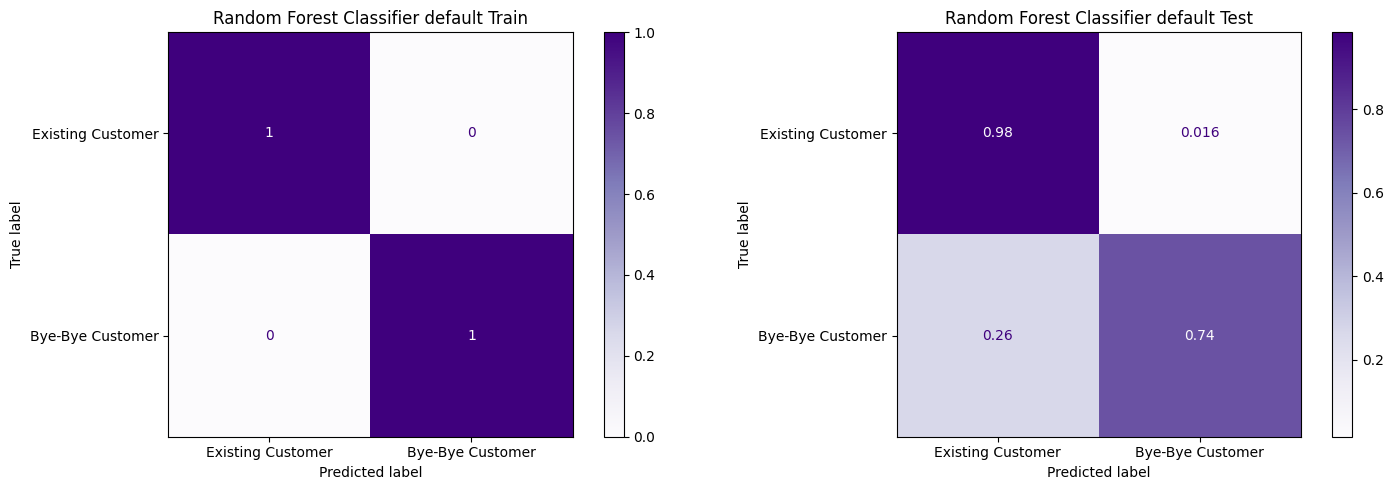

Random Forest Classifier default Train Classification Report
                   precision    recall  f1-score   support

Existing Customer       1.00      1.00      1.00      6387
 Bye-Bye Customer       1.00      1.00      1.00      1208

         accuracy                           1.00      7595
        macro avg       1.00      1.00      1.00      7595
     weighted avg       1.00      1.00      1.00      7595

Random Forest Classifier default Test Classification Report
                   precision    recall  f1-score   support

Existing Customer       0.95      0.98      0.97      2113
 Bye-Bye Customer       0.90      0.74      0.81       419

         accuracy                           0.94      2532
        macro avg       0.93      0.86      0.89      2532
     weighted avg       0.94      0.94      0.94      2532



None

In [ ]:
# plot RandomForest confusion matrices & classification report
rfclfdefault_metrics = plot_classification_traintest_metrics(rfclf_pipe, X_train, y_train, X_test, y_test, model_name='Random Forest Classifier default',cmap='Purples')
display(rfclfdefault_metrics)

#### **GridSearchCV Random Forest Classifier**

---

In [ ]:
# get default parameters
rfclf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f80c72897c0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Uneducate...
                                                                                 'Gold',
                                                                                 'Platinum'],
                       

In [ ]:
est_depths = [estimator.get_depth() for estimator in rf_clf.estimators_]
max(est_depths)

26

In [ ]:
# Select hyperparameters to tune with GridSearchCV
rfclfpipe_param_grid = {'randomforestclassifier__n_estimators': [50,100,200],
          'randomforestclassifier__max_depth': [2,5,10,15,21,27],
          'randomforestclassifier__min_samples_split': [2,5,10]}

In [ ]:
# instantiate GridSearchCV Class
rfclf_pipe_gs = GridSearchCV(rfclf_pipe, rfclfpipe_param_grid)

#  Fit GridSearchCV on Training Data
%timeit rfclf_pipe_gs.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

In [ ]:
# find the best parameters
print('Best Random Forest Classifier Parameters:')
print(rfclf_pipe_gs.best_params_)

# assign as the best knn model
best_rfclfpipe = rfclf_pipe_gs.best_estimator_

# show accuracy of best model
print(f'Accuracy of Tuned Random Forest Classifier model is: {best_rfclfpipe.score(X_test, y_test):.2%}')

In [ ]:
# save predictions for best rf model for train & test data
bestrfclf_train_preds = best_rfclfpipe.predict(X_train)
bestrfclf_test_preds = best_rfclfpipe.predict(X_test)

In [ ]:
# plot random forest classifier confusion matrices & classification report
rfclfbest_metrics = plot_classification_traintest_metrics(best_rfclfpipe, X_train, y_train, X_test, y_test, model_name='Random Forest Classifier Tuned',cmap='Greens')
display(rfclfbest_metrics)

In [ ]:
# Summary Default & Best Random Forest Classifier Model Comparison
# plot Confusion Matrices and classification report 
fig, axes = plt.subplots(1,2, figsize=(15,5))


ConfusionMatrixDisplay.from_predictions(y_test, rfclf_test_preds,
                                        cmap='Purples', normalize='true',
                                        display_labels=labels, ax=axes[0])

axes[0].set_title('Random Forest Classifier Test Default')

ConfusionMatrixDisplay.from_predictions(y_test, bestrfclf_test_preds,
                                        cmap='Greens', normalize='true',
                                        display_labels=labels, ax=axes[1])

axes[1].set_title('Random Forest Classifier Test Tuned')
plt.tight_layout()
plt.show()

rfclf_test_report = classification_report(y_test, rfclf_test_preds,
                                         target_names=labels)
print('Random Forest Classifier (Default) Test Classification Report')
print(rfclf_test_report)

bestrfclf_test_report = classification_report(y_test, bestrfclf_test_preds, target_names=labels)
print('Random Forest Classifier (Tuned) Test Classification Report')
print(bestrfclf_test_report)


#### **Summary Random Forest Classifier**

---


*  The best model is the default Random Forest Model. Note that the Training scores slightly decreased with the Tuned Random Forest Classifier.
*  HyperParameters for Tuned Random Forest Classifier Model
   * number of estimators : 100 *(same as Default)*
   * max depth : 15 *(close to Default 12)*
   * min samples split : 5 *(same as Default)*
* The overall accuracy slightly decreased with the Tuned Random Forest Classifier model.

### **Building a KNN Classifier**

---

In [ ]:
# instantiate knn classifier default, default n neighbors = 5
knn = KNeighborsClassifier()

# create pipeline with scaler and knn
knn_pipe = make_pipeline(preprocessor,knn)

# fit on training data
%timeit knn_pipe.fit(X_train, y_train)

In [ ]:
# save predictions for training & test data
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [ ]:
# plot KNN confusion matrices & classification report
knndefault_metrics = plot_classification_traintest_metrics(knn_pipe, X_train, y_train, X_test, y_test, model_name='KNN default',cmap='Purples')
display(knndefault_metrics)

#### **GridSearchCV KNN**


In [ ]:
# get default parameters
knn_pipe.get_params()

In [ ]:
# Select hyperparameters to tune with GridSearchCV
knnpipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
          'kneighborsclassifier__p': range(1,5),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [ ]:
# instantiate GridSearchCV Class
knn_pipe_gs = GridSearchCV(knn_pipe, knnpipe_param_grid)

#  Fit GridSearchCV on Training Data
%timeit knn_pipe_gs.fit(X_train, y_train)

In [ ]:
# find the best parameters
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)

# assign as the best knn model
best_knnpipe = knn_pipe_gs.best_estimator_

# show accuracy of best model
print(f'Accuracy of best KNN model is: {best_knnpipe.score(X_test, y_test):.2%}')

In [ ]:
# save predictions for best knn model for train & test data
bestknn_train_preds = best_knnpipe.predict(X_train)
bestknn_test_preds = best_knnpipe.predict(X_test)

In [ ]:
# plot knn confusion matrices & classification report
knnbest_metrics = plot_classification_traintest_metrics(best_knnpipe, X_train, y_train, X_test, y_test, model_name='KNN Tuned',cmap='Greens')
display(knnbest_metrics)

#### **Summary of KNN default vs KNN Tuned Classifier Comparison**

---


In [ ]:
# Summary Default & Best KNN Model Comparison
# plot Confusion Matrices and classification report 
fig, axes = plt.subplots(1,2, figsize=(10,4))


ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
                                        cmap='Purples', normalize='true',
                                        display_labels=labels, ax=axes[0])

axes[0].set_title('KNN Test Default')

ConfusionMatrixDisplay.from_predictions(y_test, bestknn_test_preds,
                                        cmap='Greens', normalize='true',
                                        display_labels=labels, ax=axes[1])

axes[1].set_title('KNN Test Tuned')
plt.tight_layout()
plt.show()

knn_test_report = classification_report(y_test, knn_test_preds,
                                         target_names=labels)
print('KNN (Default) Test Classification Report')
print(knn_test_report)

bestknn_test_report = classification_report(y_test, bestknn_test_preds, target_names=labels)
print('KNN (Tuned) Test Classification Report')
print(bestknn_test_report)


#### **Summary KNN**
---

*  The best model is the Tuned KNN Model, though only slightly. The Tuned KNN only had slightly better precision, slightly worse recall, and equivalent f1 score. Accuracy for the Tuned KNN model improved by 1%, from 89% to 90%.
*  HyperParameters for Tuned KNN Model
   * n neighbors : 8
   * Power parameter P for Minkowski metric : 1
   * weights : distance
* Both KNN models had not so good recall, 52% & 53% for the testing data.

### **Building a Logistic Regression Classifier**

---

In [ ]:
# instantiate logistic regression model default
logreg_bal = LogisticRegression(max_iter=1000, class_weight='balanced')

# create pipeline with scaler
logreg_pipe = make_pipeline(preprocessor, logreg_bal)

# Fit on training data
%timeit logreg_pipe.fit(X_train, y_train)

In [ ]:
# save predictions for training & test data
logreg_train_preds = logreg_pipe.predict(X_train)
logreg_test_preds = logreg_pipe.predict(X_test)

In [ ]:
# plot logistic regression confusion matrices & classification report
lrdefault_metrics = plot_classification_traintest_metrics(logreg_pipe, X_train, y_train, X_test, y_test, model_name='Logistic Regression default',cmap='Purples')
display(lrdefault_metrics)

#### **GridSearchCV Logistic Regression**

In [ ]:
# get default parameters
logreg_pipe.get_params()

In [ ]:
# Select hyperparameters to tune with GridSearchCV
pipe_param_grid = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'logisticregression__penalty': ['l1','l2'],
          'logisticregression__class_weight': ['balanced',{0:0.5,1:0.5},None],
          'logisticregression__solver': ['liblinear']}

In [ ]:
# instantiate GridSearchCV Class
lr_grid_search = GridSearchCV(logreg_pipe,pipe_param_grid)

In [ ]:
#  Fit GridSearchCV on Training Data
%timeit lr_grid_search.fit(X_train, y_train)

In [ ]:
# find the best parameters
print('Tuned Logistic Regression Parameters:')
print(lr_grid_search.best_params_)

# assign as the best knn model
best_lr_pipe = lr_grid_search.best_estimator_

# show accuracy of best model
print(f'Accuracy of Tuned Logistic Regression model is: {best_lr_pipe.score(X_test, y_test):.2%}')

In [ ]:
# Fit on training data for best logistic regression model
best_lr_pipe.fit(X_train, y_train)

In [ ]:
# save predictions for training & test data
bestlr_train_preds = best_lr_pipe.predict(X_train)
bestlr_test_preds = best_lr_pipe.predict(X_test)

In [ ]:
# plot logistic regression confusion matrices & classification report
lrbest_metrics = plot_classification_traintest_metrics(best_lr_pipe, X_train, y_train, X_test, y_test, model_name='Logistic Regression Tuned',cmap='Greens')
display(lrbest_metrics)

#### **Summary of Logistic Regression Classifier default vs. Tuned Model Comparison**
---


In [ ]:
# Summary Default & Best Logistic Regression Model Comparison
# plot Confusion Matrices and classification report 
fig, axes = plt.subplots(1,2, figsize=(10,4))


ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_preds,
                                        cmap='Purples', normalize='true',
                                        display_labels=labels, ax=axes[0])

axes[0].set_title('Logistic Regression Test Default')

ConfusionMatrixDisplay.from_predictions(y_test, bestlr_test_preds,
                                        cmap='Greens', normalize='true',
                                        display_labels=labels, ax=axes[1])

axes[1].set_title('Logistic Regression Test Tuned')
plt.tight_layout()
plt.show()

logreg_test_report = classification_report(y_test, logreg_test_preds,
                                         target_names=labels)
print('Logistic Regression (Default) Test Classification Report')
print(logreg_test_report)

bestlr_test_report = classification_report(y_test, bestlr_test_preds, target_names=labels)
print('Logistic Regression (Tuned) Test Classification Report')
print(bestlr_test_report)

#### **Summary Logistic Regression**

---


*  The best model is the Tuned Logistic Regression Model, improving accuracy from 82% to 89%.
*  HyperParameters for Tuned Logistic Regression Model
   * C value = 0.1 *(same as Default)*
   * Class weight 0 : None
   * Penalty : L2 



### **Optimal Baseline Model : Random Forest Classifier default**
---

* #### Overall, the Optimal Baseline model is the Random Forest Classifier default model.
* #### Accuracy on the testing data is 95%.


In [ ]:
# plot RandomForest confusion matrices & classification report
rfclfdefault_metrics = plot_classification_traintest_metrics(rfclf_pipe, X_train, y_train, X_test, y_test, model_name='Random Forest Classifier default',cmap='Purples')
display(rfclfdefault_metrics)

## **Random Forest Classifier Model default with PCA**

---

### **Scale Data**

In [ ]:
# create PCA pipe with scaler, PCA covering 95% variance, and KNN classifier
pipe_prePCA = make_pipeline(
    preprocessor,
    scaler
)

# Fit & transform data.
scaled_df = pipe_prePCA.fit_transform(X)

### **Apply PCA**

In [ ]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

### **Visualize Scree Plot**

In [ ]:
# Note: this shows how much of the variance does each component explain

pd.Series(pca.explained_variance_ratio_)[0:200]

In [ ]:
# Lets visual the cummulative sum of the variances 

plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

# Plot labels and titles
plt.xlabel("Principal Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Credit Card Segmentation Scree Plot", fontsize="xx-large")
plt.grid()
plt.show();

* ### The number of components to account for ~95% of the variance is 13.

### **Random Forest Classifier PCA Model**

---

In [ ]:
# create PCA pipe with scaler, PCA with 13 principal components, and Random Forest classifier
pipe_PCA = make_pipeline(
    preprocessor,
    PCA(n_components=13),
    RandomForestClassifier()
)

In [ ]:
# fit PCA pipe (see how long it takes)
%timeit pipe_PCA.fit(X_train,y_train)

In [ ]:
# save predictions for training & test data
rfclf_PCA_train_preds = pipe_PCA.predict(X_train)
rfclf_PCA_test_preds = pipe_PCA.predict(X_test)

In [ ]:
# plot RandomForest confusion matrices & classification report
rfclf_PCA_metrics = plot_classification_traintest_metrics(pipe_PCA, X_train, y_train, X_test, y_test, model_name='Random Forest PCA',cmap='Purples')
display(rfclf_PCA_metrics)

#### **GridSearchCV Random Forest Classifier with PCA**
---

In [ ]:
# get default parameters
pipe_PCA.get_params()

In [ ]:
est_depths = [estimator.get_depth() for estimator in rf_clf.estimators_]
max(est_depths)

In [ ]:
# Select hyperparameters to tune with GridSearchCV
pipePCA_param_grid = {'randomforestclassifier__n_estimators': [50,100],
          'randomforestclassifier__max_depth': [2,5,10,20,28],
           'randomforestclassifier__class_weight': ['balanced','balanced_subsample',None]}             


In [ ]:
# instantiate GridSearchCV Class
pipe_PCA_gs = GridSearchCV(pipe_PCA, pipePCA_param_grid)

#  Fit GridSearchCV on Training Data
%timeit pipe_PCA_gs.fit(X_train, y_train)

In [ ]:
# find the best parameters
print('Best Random Forest Classifier Parameters:')
print(pipe_PCA_gs.best_params_)

# assign as the best knn model
best_rfclfpipePCA = pipe_PCA_gs.best_estimator_

# show accuracy of best model
print(f'Accuracy of Tuned Random Forest Classifier model with PCA is: {best_rfclfpipePCA.score(X_test, y_test):.2%}')

In [ ]:
# save predictions for best rf model for train & test data
bestrfclf_PCA_train_preds = best_rfclfpipePCA.predict(X_train)
bestrfclf_PCA_test_preds = best_rfclfpipePCA.predict(X_test)

In [ ]:
# plot random forest classifier confusion matrices & classification report
rfclfPCA_best_metrics = plot_classification_traintest_metrics(best_rfclfpipePCA, X_train, y_train, X_test, y_test, model_name='Random Forest PCA Tuned',cmap='Greens')
display(rfclfPCA_best_metrics)

In [ ]:
# Summary Default & Best Random Forest Classifier Model Comparison
# plot Confusion Matrices and classification report 
fig, axes = plt.subplots(1,2, figsize=(15,5))


ConfusionMatrixDisplay.from_predictions(y_test, rfclf_PCA_test_preds,
                                        cmap='Purples', normalize='true',
                                        display_labels=labels, ax=axes[0])

axes[0].set_title('Random Forest Classifier Test with PCA')

ConfusionMatrixDisplay.from_predictions(y_test, bestrfclf_PCA_test_preds,
                                        cmap='Greens', normalize='true',
                                        display_labels=labels, ax=axes[1])

axes[1].set_title('Random Forest Classifier Test with PCA Tuned')
plt.tight_layout()
plt.show()

rfclfPCA_test_report = classification_report(y_test, rfclf_PCA_test_preds,
                                         target_names=labels)
print('Random Forest Classifier (Default) Test with PCA Classification Report')
print(rfclfPCA_test_report)

bestrfclfPCA_test_report = classification_report(y_test, bestrfclf_PCA_test_preds, target_names=labels)
print('Random Forest Classifier (Tuned) Test with PCA Classification Report')
print(bestrfclfPCA_test_report)


### **Summary Random Forest Classifier with PCA, default vs Tuned**
---

The best model is the default Random Forest Model with PCA, compared to the Tuned Random Forest model with PCA. The results for the Tuned model is slightly worse.
*  HyperParameters for Tuned Random Forest Classifier Model
   * number of estimators : 100 *(same as Default)*
   * max depth : 20 *(close to Default 12)*
   * class_weight : None *(same as Default)*
* Accuracy for the Tuned Random Forest Classifier Model decreases from 90% to 89%.


## **Summary Comparison of noPCA vs PCA**
---

### **Optimal Model : Random Classifier (default) noPCA**

The Random Forest Classifier default model remains the optimal model, without PCA.
* In this case, less data does not improve performance.

* Noted earlier there is a class imbalance; hence, opting to try to fine-tune the Optimal no PCA model.

In [ ]:
# Summary Default & Best Random Forest Classifier Model Comparison
# plot Confusion Matrices and classification report 
fig, axes = plt.subplots(1,2, figsize=(15,5))


ConfusionMatrixDisplay.from_predictions(y_test, rfclf_PCA_test_preds,
                                        cmap='Purples', normalize='true',
                                        display_labels=labels, ax=axes[0])

axes[0].set_title('Random Forest Classifier Test with PCA')

ConfusionMatrixDisplay.from_predictions(y_test, rfclf_test_preds,
                                        cmap='Greens', normalize='true',
                                        display_labels=labels, ax=axes[1])

axes[1].set_title('Random Forest Classifier Test with PCA Tuned')
plt.tight_layout()
plt.show()

rfclfPCA_test_report = classification_report(y_test, rfclf_PCA_test_preds,
                                         target_names=labels)
print('Random Forest Classifier (Default) Test with PCA Classification Report')
print(rfclfPCA_test_report)

rfclf_test_report = classification_report(y_test, rfclf_test_preds, target_names=labels)
print('Random Forest Classifier (Default) Test no PCA Classification Report')
print(rfclf_test_report)


## **Fine-Tune Optimal no PCA Model for Class Imbalance**
---

In [ ]:
# show class balance
df2['Attrition_Flag'].value_counts(normalize=True)

### **Useful Functions for Classification Model Evaluation**
---

In [ ]:
## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, classes=None, 
                            figsize=(20,5), name='Classification Model', 
                            average='binary', zero_division=0):
  """Takes as required arguments: a model, traing features, training labels,
  testing feature, testing labels
  Prints a classification reports and confusion matrics for each data set
  returns a dataframe of metrics

  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure
    name: give your model a name
    average: how to aggregate scores for multiclass problems
    zero_division: what should the result of divide by zero be?"""

  # Gather model predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  # Display classification report and confusion matrices
  print('======Train Set Metrics======')
  print(metrics.classification_report(y_train, train_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  print('======Test Set Metrics======')
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))

  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize, ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                              display_labels=classes,
                              normalize=normalize, ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  plt.show()

  # If there are more than 2 classes and an average has not been set, 
  # set average to 'macro'
  if average == 'binary' and y_train.nunique() > 2:
    average = 'macro'

  # Create a dataframe of scores to return
  scores = pd.DataFrame()
  
  # Training

  scores.loc[name, 'Train Accuracy'] = accuracy_score(y_train, train_preds)
  scores.loc[name, 'Train Recall'] = recall_score(y_train, train_preds,
                                                           average=average,
                                                       zero_division=zero_division)
  scores.loc[name, 'Train Precision'] = precision_score(y_train, train_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Train F1-Score'] = f1_score(y_train, train_preds,
                                                           average=average,
                                                     zero_division=zero_division)
  
  # Testing
  scores.loc[name, 'Test Accuracy'] = accuracy_score(y_test, test_preds)
  scores.loc[name, 'Test Recall'] = recall_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test Precision'] = precision_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test F1-Score'] = f1_score(y_test, test_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  return scores

In [ ]:
## Display the Optimal Model's metrics ( Random Forest Classifier default)
score = evaluate_classification(rfclf_pipe, X_train, y_train, X_test, y_test, name='Random Forest Classifier default')
score

#### **UnderSampling**
---

In [ ]:
## Create the under sampling object
under_sampler = RandomUnderSampler()
under_pipe = smote_pipe(preprocessor, under_sampler)

In [ ]:
## Display the value counts for y_train
print(y_train.value_counts())


## undersample the y_train
X_train_under, y_train_under = under_pipe.fit_resample(X_train, y_train)
## Display the value counts for y_train_undersampled
print(y_train_under.value_counts())

In [ ]:
# Instantiate the model
rf_under = smote_pipe(preprocessor, under_sampler, RandomForestClassifier()) 

# create a pipeline and fit
rf_under.fit(X_train, y_train)

In [ ]:
# evaluate the under sampled model
under_score = evaluate_classification(rf_under, X_train, y_train, X_test, y_test,
                        name='under sampled random forest')
score = pd.concat([score, under_score])
score

#### **OverSampling**
---

In [ ]:
## Create the under sampling object
over_sampler = RandomOverSampler()

over_pipe = smote_pipe(preprocessor, over_sampler)

In [ ]:
## Display the value counts for y_train
print(y_train.value_counts())

X_train_over, y_train_over = over_pipe.fit_resample(X_train, y_train)
## oversample the y_train

## Display the value counts for y_train_undersampled
print(y_train_over.value_counts())

In [ ]:
# Instantiate a oversampled random forest model
rf_over = RandomForestClassifier()
# create and fit pipeline
rf_over_pipe = smote_pipe(preprocessor, over_sampler, rf_over) 
rf_over_pipe.fit(X_train, y_train)

In [ ]:
# evaluate the oversampled model
over_score = evaluate_classification(rf_over_pipe, X_train, y_train, X_test, y_test,
                        name='over sampled random forest')
score = pd.concat([score, over_score])
score

#### **SMOTE**
---

In [ ]:
## Display the value counts for y_train
y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
## Create an instance of the transformer
smote = SMOTE()
# Split the dataset

sm_pipe = smote_pipe(preprocessor, smote)

In [ ]:
## Display the value counts for y_train_smote
print(y_train.value_counts())
_, y_train_smote = sm_pipe.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

In [ ]:
## Create an instance of the model
rf_smote = RandomForestClassifier()

## Create a model pipeline
rf_smote = smote_pipe(preprocessor, smote, rf_smote)

## Fit the model
rf_smote.fit(X_train, y_train)

In [ ]:
## Evaluate the SMOTE model
smote_score = evaluate_classification(rf_smote, X_train, y_train, X_test, y_test, 
                        name='random forest SMOTE')

score = pd.concat([score, smote_score])

score

### **Results from Fine-Tuning Class Imbalance**
---


In [ ]:
# Sort 'score' by a metric (Which one?)
score.sort_values(by='Test Recall', ascending=False)

<br />
<br />

## **Final Model Selection**

---

#### The best model is the SMOTE Random Classifier model, *without PCA*.
   * #### By optimizing for class imbalance, this improves the Test Recall from 74% to 81%. Recall tells you the False Negatives. In this case, a False Negative is where the model predicts the credit card customer would not leave but the credit card customer actually does leave! We want to minimize False Negatives.
   * #### Precision score is slightly less, down from 90% down to 83%, but a False Positive is not such a bad thing. This would mean the Model predicted that the customer would leave but customer stayed with the credit card company.
   
* #### The SMOTE default Random Forest Classifier has an accuracy of 94%, the same as the prior optimal model. 



In [ ]:
# plot RandomForest confusion matrices & classification report
smote_rf_metrics = plot_classification_traintest_metrics(rf_smote, X_train, y_train, X_test, y_test, model_name='SMOTE Random Forest',cmap='Purples')
display(smote_rf_metrics)

## **Final Recommendations for Credit Card Attrition**

---


1. #### Marketing to those with lower Average Utilization ratio, higher Card class could prevent customers from leaving credit card company.
2. #### Credit card customers that do not carry a balance are more likely to leave credit card company. These customers may have been inactive or have contacted us recently. Sometimes contacting us indicates dissatisfaction. Offering incentives could entice these customers to utilize more credit, resulting in more profit for credit card company.
3. #### Those with more Available balance to Buy (better credit, higher incomes) often leave credit card company. Marketing to these income classes could help in retaining more customers.